In [156]:
import pandas as pd
import numpy as np

from linearmodels.panel import PanelOLS, RandomEffects

import warnings

warnings.filterwarnings("ignore")

spain_epu_index_path = f"D:\Hangze Wu\BSE\DSDM\semester3\Master Thesis\github_thesis\deloitte_digital_banking\deloitte_digital_banking\data\\NEW_SPAIN_EPU_INDEX.xlsx"
spain_epu_indexn_data = pd.read_excel(spain_epu_index_path,skiprows= 1)

In [157]:
spain_epu_indexn_data.rename(columns={'Index value':'spain_epu'},inplace=True)

spain_epu_indexn_data['date'] = pd.to_datetime(spain_epu_indexn_data['Year'].astype(str) + '-' + spain_epu_indexn_data['Month'].astype(str), format='%Y-%m')

# Drop the original 'Year' and 'Month' columns as they are no longer necessary
spain_epu_indexn_data = spain_epu_indexn_data.drop(['Year', 'Month'], axis=1)

spain_epu_indexn_data.head(3)

spain_epu       date
0  31.018169 1997-01-01
1  50.695080 1997-02-01
2  43.754341 1997-03-01

In [158]:
regression_clean_data_path = f"D:\Hangze Wu\BSE\DSDM\semester3\Master Thesis\github_thesis\deloitte_digital_banking\deloitte_digital_banking\data\\regression_clean_data.csv"
regression_clean_data = pd.read_csv(regression_clean_data_path)

regression_clean_data['date'] = pd.to_datetime(regression_clean_data ['date'])

# Merge the dataframes on the 'date' column
merged_df = pd.merge(regression_clean_data , spain_epu_indexn_data, on='date', how='inner')

merged_df.head(3)

bank       date   web_traffic  cross_visitation  search_interest  rank  \
0  abanca 2021-12-01  15202.983835          0.077994             7.75   4.0   
1  abanca 2022-01-01  42183.913207          0.062500             7.80   4.0   
2  abanca 2022-02-01  34498.153115          0.052288             7.25   4.0   

   incentive  apr  mentions   spain_epu  
0      150.0  0.0       1.0  159.575287  
1      150.0  0.0       1.0  124.229675  
2      150.0  0.0       2.0  133.508606

In [159]:
final_regression_clean_data_path = f"D:\Hangze Wu\BSE\DSDM\semester3\Master Thesis\github_thesis\deloitte_digital_banking\deloitte_digital_banking\data\\final_regression_data.csv"
final_regression_clean_data = pd.read_csv(final_regression_clean_data_path)

import pandas as pd

final_regression_clean_data['date'] = pd.to_datetime(final_regression_clean_data['date'])

# Set 'bank' and 'date' as indices for easier merging
merged_df.set_index(['bank', 'date'], inplace=True)
final_regression_clean_data.set_index(['bank', 'date'], inplace=True)

# Drop duplicates if all other info is the same or aggregate as needed
final_regression_clean_data = final_regression_clean_data[~final_regression_clean_data.index.duplicated(keep='first')]
# Columns to bring from final_regression_clean_data - those not in merged_df
columns_to_add = ['number_of_employee', 'assets_under_management', 'number_of_branches', 'age', 'has_stores', 'founded_before_2000']

# Merge while keeping all entries from merged_df
result_df = merged_df.join(final_regression_clean_data[columns_to_add], how='left')

result_df

web_traffic  cross_visitation  search_interest  \
bank      date                                                          
abanca    2021-12-01  15202.983835          0.077994             7.75   
          2022-01-01  42183.913207          0.062500             7.80   
          2022-02-01  34498.153115          0.052288             7.25   
          2022-03-01  34546.319021          0.061503             6.75   
          2022-04-01  40508.288420          0.050222             6.75   
...                            ...               ...              ...   
santander 2023-08-01  34290.160425          0.118914            50.50   
          2023-09-01  40388.737821          0.125496            56.25   
          2023-10-01  36636.706633          0.126347            58.60   
          2023-11-01  35387.630139          0.121212            59.75   
          2023-12-01  29101.697517          0.159196            62.80   

                          rank  incentive  apr  mentions   spain_epu  \
bank      date                                                         
abanca    2021-12-01  4.000000      150.0  0.0       1.0  159.575287   
          2022-01-01  4.000000      150.0  0.0       1.0  124.229675   
          2022-02-01  4.000000      150.0  0.0       2.0  133.508606   
          2022-03-01  4.000000      150.0  0.0       2.0  169.824524   
          2022-04-01  4.000000      300.0  0.0       2.0  164.849472   
...                        ...        ...  ...       ...         ...   
santander 2023-08-01  3.500000      150.0  0.0       1.0  108.436684   
          2023-09-01  3.500000      400.0  0.0       3.0  120.350243   
          2023-10-01  3.500000      400.0  0.0       4.0  147.136810   
          2023-11-01  1.500000      400.0  0.0       3.0  145.526611   
          2023-12-01  1.806452      400.0  0.0       2.0  140.714752   

                      number_of_employee  assets_under_management  \
bank      date                                                      
abanca    2021-12-01                5946              72148000000   
          2022-01-01                5946              72148000000   
          2022-02-01                5946              72148000000   
          2022-03-01                5946              72148000000   
          2022-04-01                5946              72148000000   
...                                  ...                      ...   
santander 2023-08-01              212764            1117000000000   
          2023-09-01              212764            1117000000000   
          2023-10-01              212764            1117000000000   
          2023-11-01              212764            1117000000000   
          2023-12-01              212764            1117000000000   

                      number_of_branches  age  has_stores  founded_before_2000  
bank      date                                                                  
abanca    2021-12-01                 690   13           1                    0  
          2022-01-01                 690   13           1                    0  
          2022-02-01                 690   13           1                    0  
          2022-03-01                 690   13           1                    0  
          2022-04-01                 690   13           1                    0  
...                                  ...  ...         ...                  ...  
santander 2023-08-01                8518  167           1                    1  
          2023-09-01                8518  167           1                    1  
          2023-10-01                8518  167           1                    1  
          2023-11-01                8518  167           1                    1  
          2023-12-01                8518  167           1                    1  

[275 rows x 14 columns]

In [161]:
#result_df.to_csv('epu_regression_data.csv')

In [160]:
regression_clean_data = result_df
regression_clean_data['Log_Web_Traffic'] = np.log1p(regression_clean_data['web_traffic'])
regression_clean_data['Log_incentive'] = np.log1p(regression_clean_data['incentive'])
regression_clean_data['Log_spain_epu'] = np.log1p(regression_clean_data['spain_epu'])

#regression_clean_data['date'] = pd.to_datetime(regression_clean_data['date'])

# Set index for panel data
#regression_clean_data.set_index(['bank', 'date'], inplace=True)

# Sort the DataFrame by the index
#regression_clean_data.sort_index(inplace=True)

display(regression_clean_data.head(3))

# Check how many unique account products
unique_account_products = regression_clean_data.index.get_level_values('bank').nunique()
print(f"Number of unique account products: {unique_account_products}")

web_traffic  cross_visitation  search_interest  rank  \
bank   date                                                                
abanca 2021-12-01  15202.983835          0.077994             7.75   4.0   
       2022-01-01  42183.913207          0.062500             7.80   4.0   
       2022-02-01  34498.153115          0.052288             7.25   4.0   

                   incentive  apr  mentions   spain_epu  number_of_employee  \
bank   date                                                                   
abanca 2021-12-01      150.0  0.0       1.0  159.575287                5946   
       2022-01-01      150.0  0.0       1.0  124.229675                5946   
       2022-02-01      150.0  0.0       2.0  133.508606                5946   

                   assets_under_management  number_of_branches  age  \
bank   date                                                           
abanca 2021-12-01              72148000000                 690   13   
       2022-01-01              72148000000                 690   13   
       2022-02-01              72148000000                 690   13   

                   has_stores  founded_before_2000  Log_Web_Traffic  \
bank   date                                                           
abanca 2021-12-01           1                    0         9.629313   
       2022-01-01           1                    0        10.649818   
       2022-02-01           1                    0        10.448690   

                   Log_incentive  Log_spain_epu  
bank   date                                      
abanca 2021-12-01        5.01728       5.078763  
       2022-01-01        5.01728       4.830149  
       2022-02-01        5.01728       4.901628

Number of unique account products: 11


In [187]:
filtered_df = regression_clean_data

#### previous 2 Lag & 12 Month Dummies

In [194]:
filtered_df = regression_clean_data


import pandas as pd
# Ensure the DataFrame is sorted by 'bank' and 'date'
filtered_df = filtered_df.sort_index()

# Create lagged variables for past 1, 2, 3, and 4 months of web traffic
filtered_df['Log_Web_Traffic_Lag1'] = filtered_df.groupby(level='bank')['Log_Web_Traffic'].shift(1)
#filtered_df['Log_Web_Traffic_Lag2'] = filtered_df.groupby(level='bank')['Log_Web_Traffic'].shift(2)
#filtered_df['Log_Web_Traffic_Lag3'] = filtered_df.groupby(level='bank')['Log_Web_Traffic'].shift(3)
#filtered_df['Log_Web_Traffic_Lag4'] = filtered_df.groupby(level='bank')['Log_Web_Traffic'].shift(4)

# Drop rows with NaN values resulting from the lag operation
filtered_df = filtered_df.dropna()

# Check for duplicates
duplicates = filtered_df[filtered_df.index.duplicated()]

web_traffic_columns = filtered_df.filter(regex='(?i)web')
print("DataFrame with lagged variables:")
display(web_traffic_columns.head(3))

if not duplicates.empty:
    print("Duplicate entries found:")
    print(duplicates)
else:
    print("No duplicate entries found.")
    
# Extract month from the Date index and create dummy variables
filtered_df['Month'] = filtered_df.index.get_level_values('date').month
monthly_dummies = pd.get_dummies(filtered_df['Month'], prefix='Month', drop_first=False)

# Concatenate the dummy variables with the original DataFrame
filtered_df = pd.concat([filtered_df, monthly_dummies], axis=1)

print("DataFrame with monthly dummy variables:")

# Ensure the Month_9 column is numeric (if it contains True/False)
for month in ['Month_1','Month_2','Month_3','Month_4','Month_5','Month_6','Month_7','Month_8','Month_9','Month_10','Month_11','Month_12']:
    filtered_df[ month ] = filtered_df[ month ].astype(int)
    

# Filter columns that contain 'Month_'
month_columns = filtered_df.filter(like='Month_')
# Display the first 12 rows of these columns
display(month_columns.head(12))

final_df = filtered_df


DataFrame with lagged variables:


web_traffic  Log_Web_Traffic  Log_Web_Traffic_Lag1
bank   date                                                           
abanca 2022-01-01  42183.913207        10.649818              9.629313
       2022-02-01  34498.153115        10.448690             10.649818
       2022-03-01  34546.319021        10.450085             10.448690

No duplicate entries found.
DataFrame with monthly dummy variables:


Month_1  Month_2  Month_3  Month_4  Month_5  Month_6  \
bank   date                                                               
abanca 2022-01-01        1        0        0        0        0        0   
       2022-02-01        0        1        0        0        0        0   
       2022-03-01        0        0        1        0        0        0   
       2022-04-01        0        0        0        1        0        0   
       2022-05-01        0        0        0        0        1        0   
       2022-06-01        0        0        0        0        0        1   
       2022-07-01        0        0        0        0        0        0   
       2022-08-01        0        0        0        0        0        0   
       2022-09-01        0        0        0        0        0        0   
       2022-10-01        0        0        0        0        0        0   
       2022-11-01        0        0        0        0        0        0   
       2022-12-01        0        0        0        0        0        0   

                   Month_7  Month_8  Month_9  Month_10  Month_11  Month_12  
bank   date                                                                 
abanca 2022-01-01        0        0        0         0         0         0  
       2022-02-01        0        0        0         0         0         0  
       2022-03-01        0        0        0         0         0         0  
       2022-04-01        0        0        0         0         0         0  
       2022-05-01        0        0        0         0         0         0  
       2022-06-01        0        0        0         0         0         0  
       2022-07-01        1        0        0         0         0         0  
       2022-08-01        0        1        0         0         0         0  
       2022-09-01        0        0        1         0         0         0  
       2022-10-01        0        0        0         1         0         0  
       2022-11-01        0        0        0         0         1         0  
       2022-12-01        0        0        0         0         0         1

### ACF PACF , QQ plot

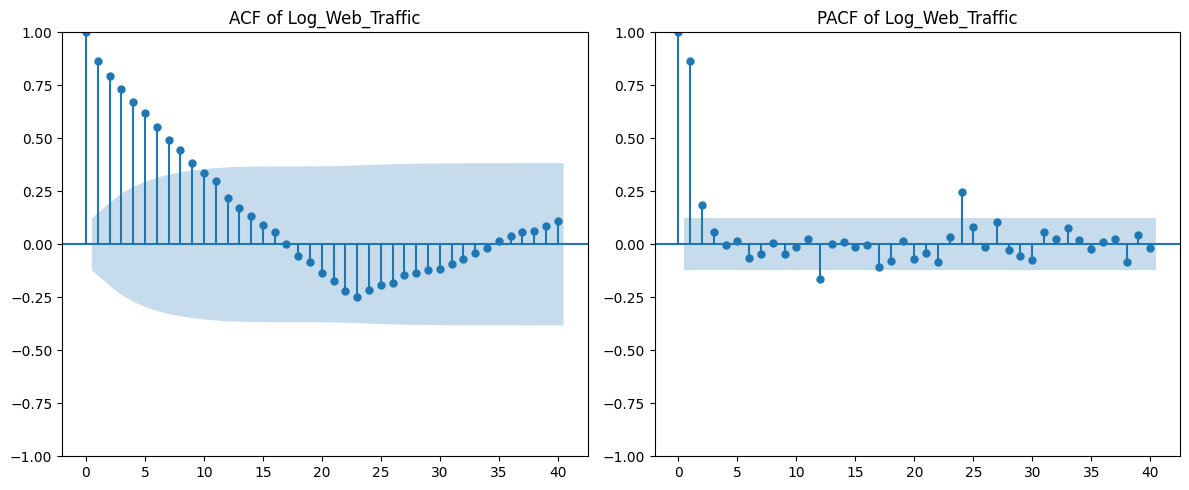

<Figure size 600x600 with 0 Axes>

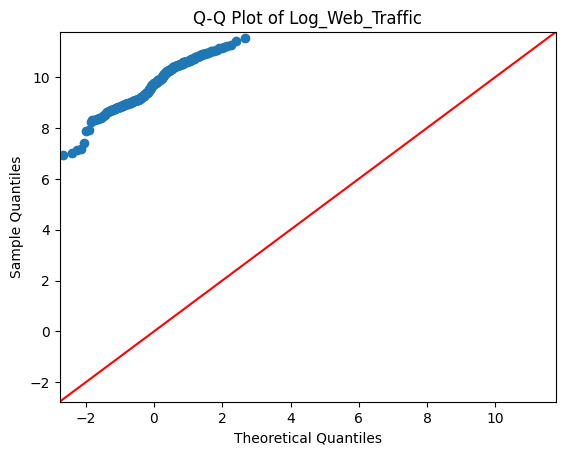

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


# Ensure all independent variables are numeric
numeric_columns = ['Log_Web_Traffic_Lag1']
filtered_df[numeric_columns] = filtered_df[numeric_columns].apply(pd.to_numeric, errors='coerce')


# Plotting ACF and PACF for Log_Web_Traffic
plt.figure(figsize=(12, 5))

# ACF plot
plt.subplot(1, 2, 1)
plot_acf(filtered_df['Log_Web_Traffic'], lags=40, ax=plt.gca())
plt.title('ACF of Log_Web_Traffic')

# PACF plot
plt.subplot(1, 2, 2)
plot_pacf(filtered_df['Log_Web_Traffic'], lags=40, ax=plt.gca(), method='ywm')
plt.title('PACF of Log_Web_Traffic')

plt.tight_layout()
plt.show()

# Q-Q plot
plt.figure(figsize=(6, 6))
sm.qqplot(filtered_df['Log_Web_Traffic'], line ='45')
plt.title('Q-Q Plot of Log_Web_Traffic')
plt.show()


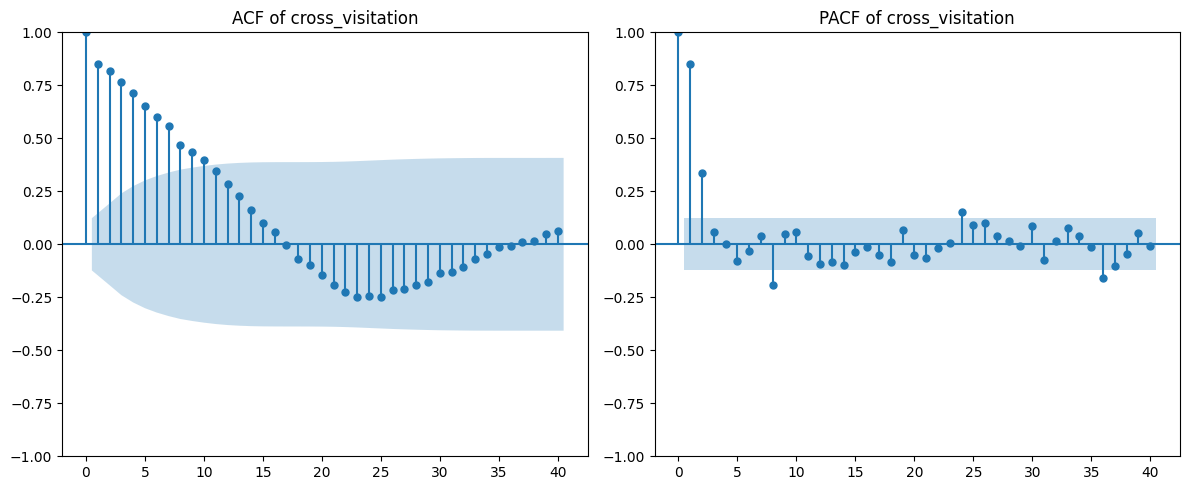

<Figure size 600x600 with 0 Axes>

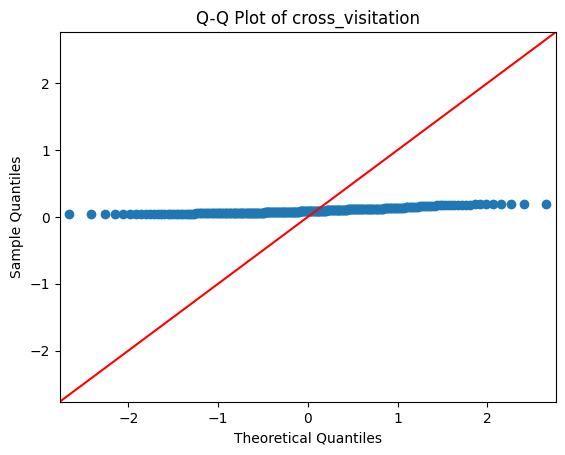

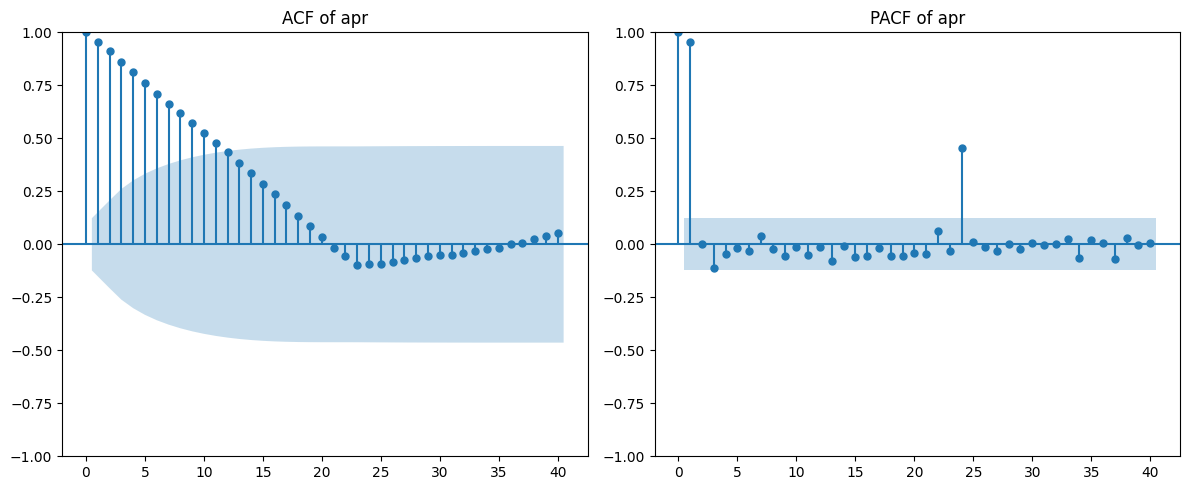

<Figure size 600x600 with 0 Axes>

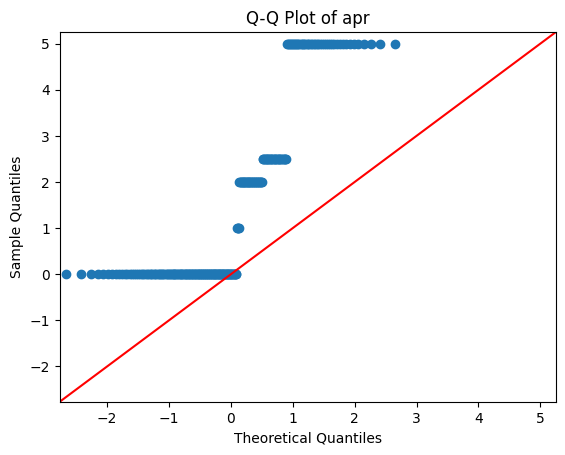

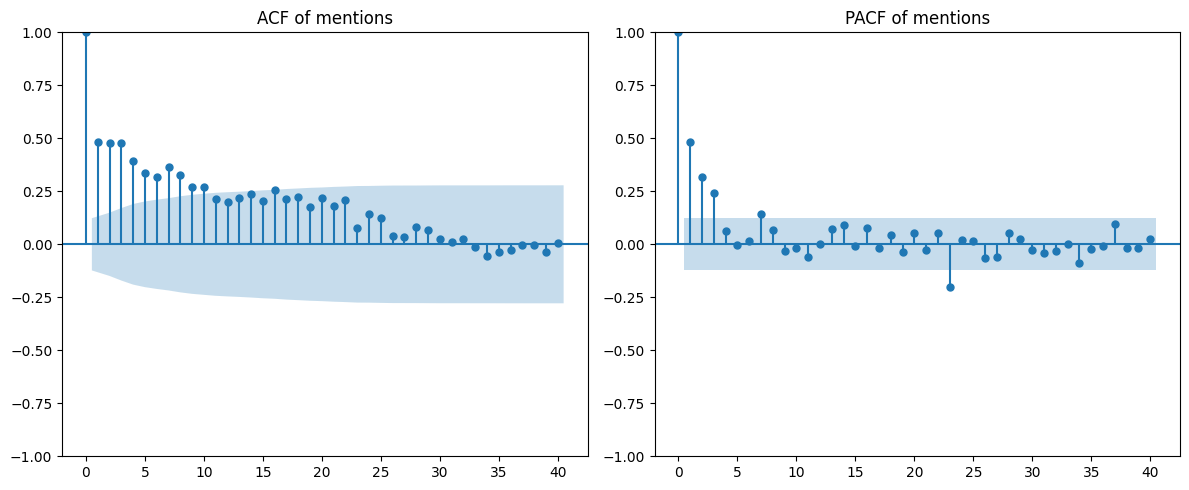

<Figure size 600x600 with 0 Axes>

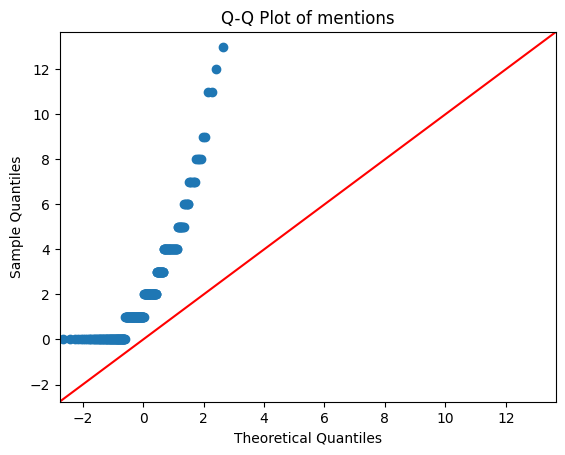

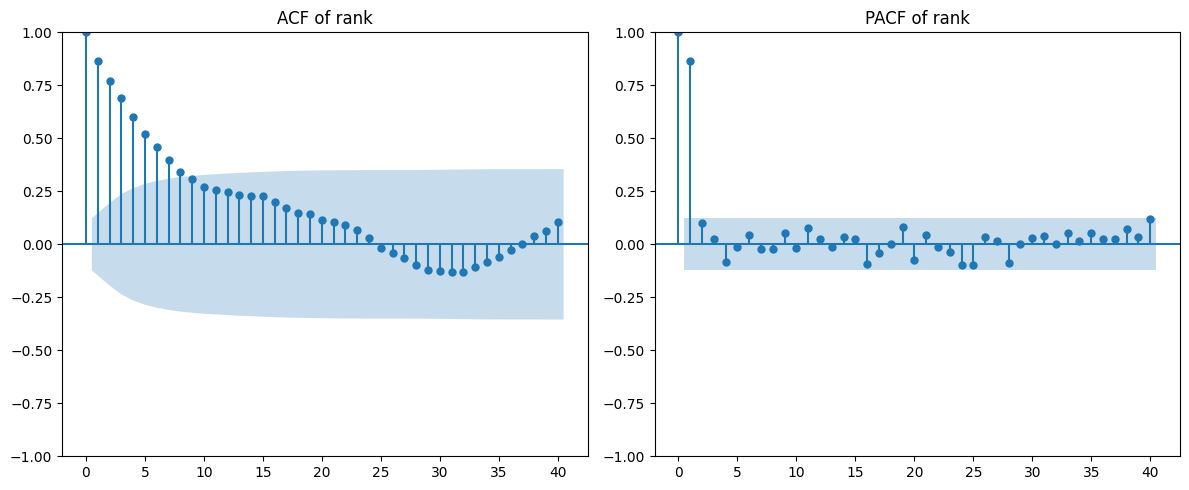

<Figure size 600x600 with 0 Axes>

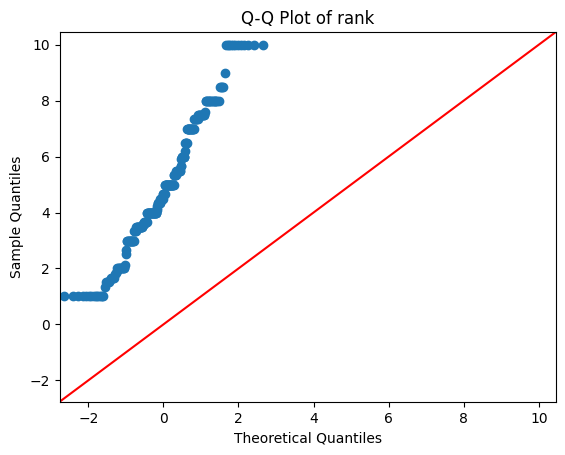

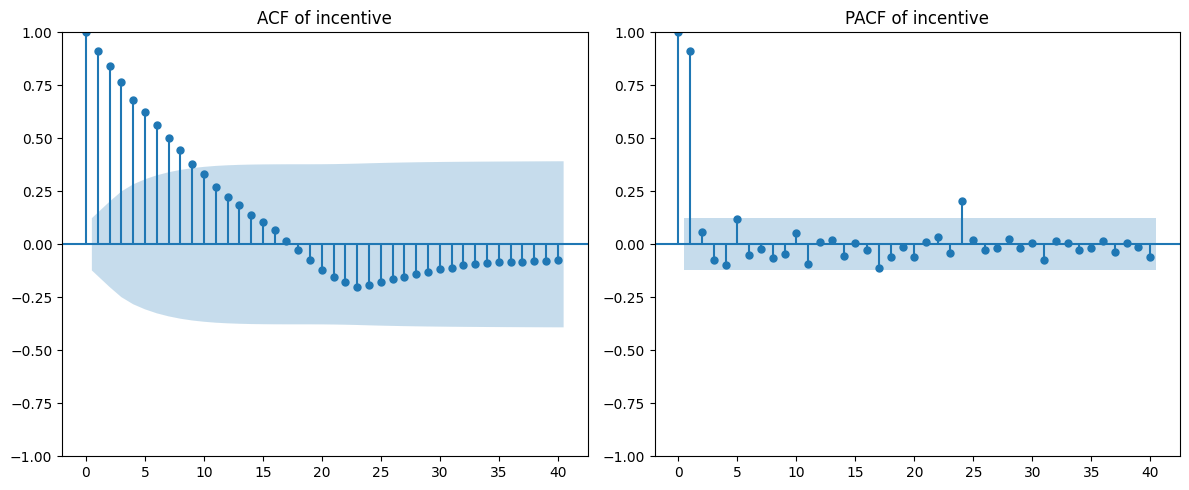

<Figure size 600x600 with 0 Axes>

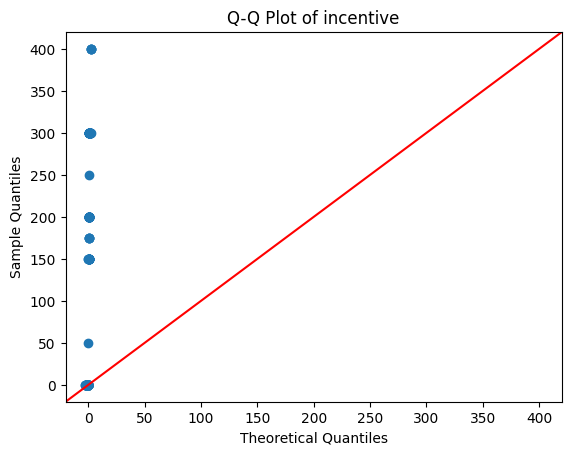

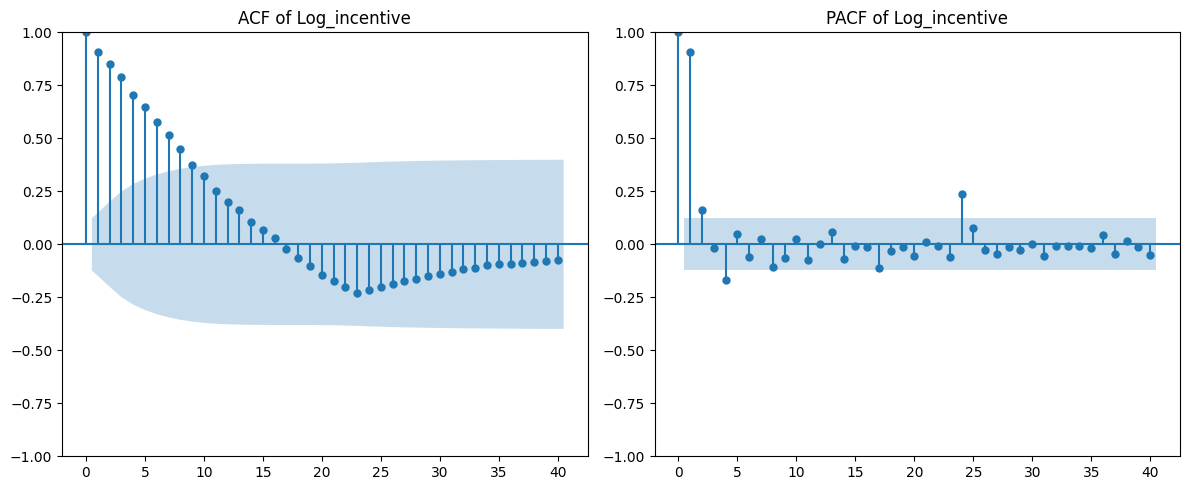

<Figure size 600x600 with 0 Axes>

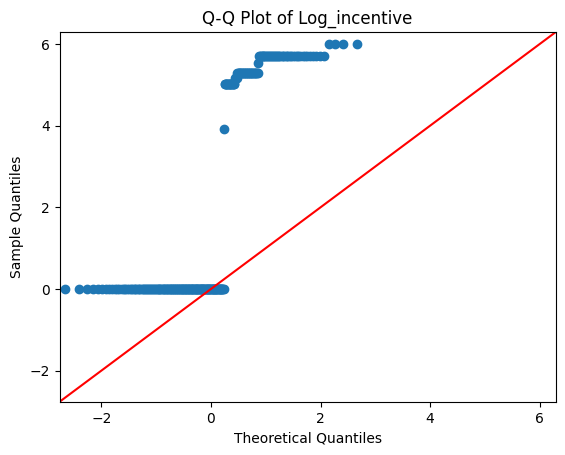

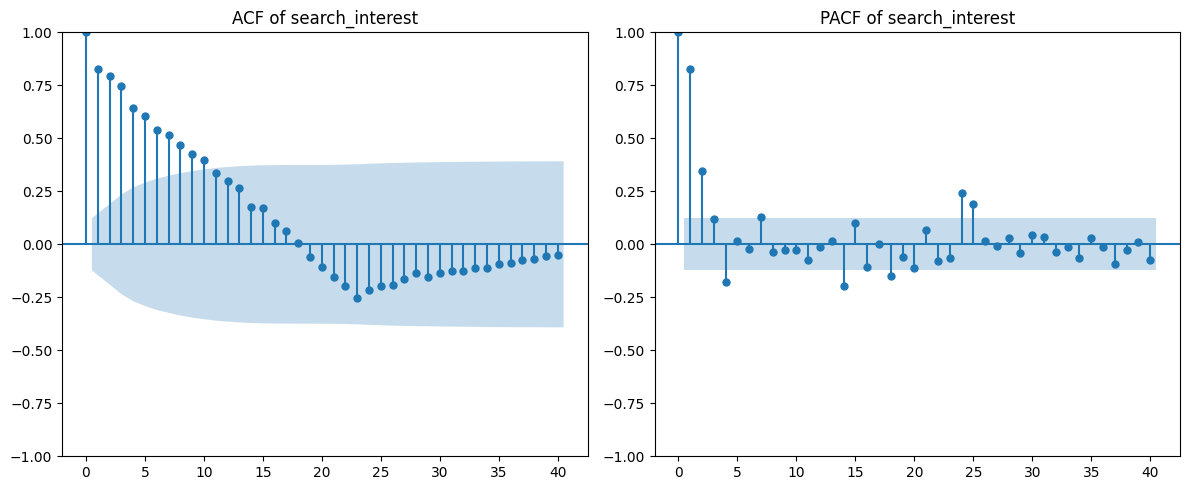

<Figure size 600x600 with 0 Axes>

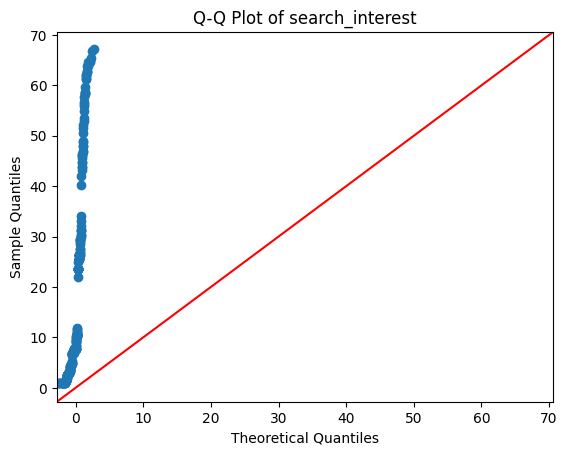

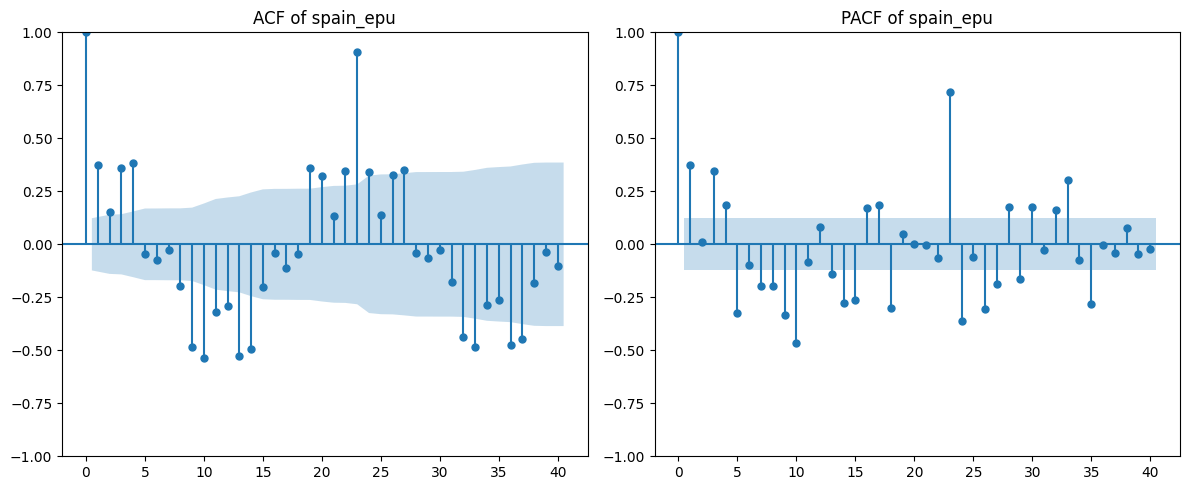

<Figure size 600x600 with 0 Axes>

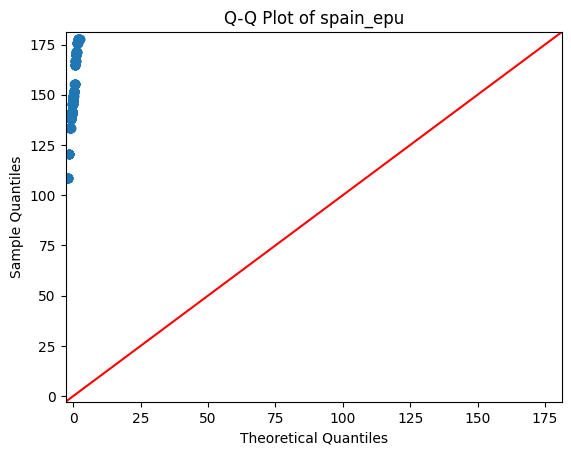

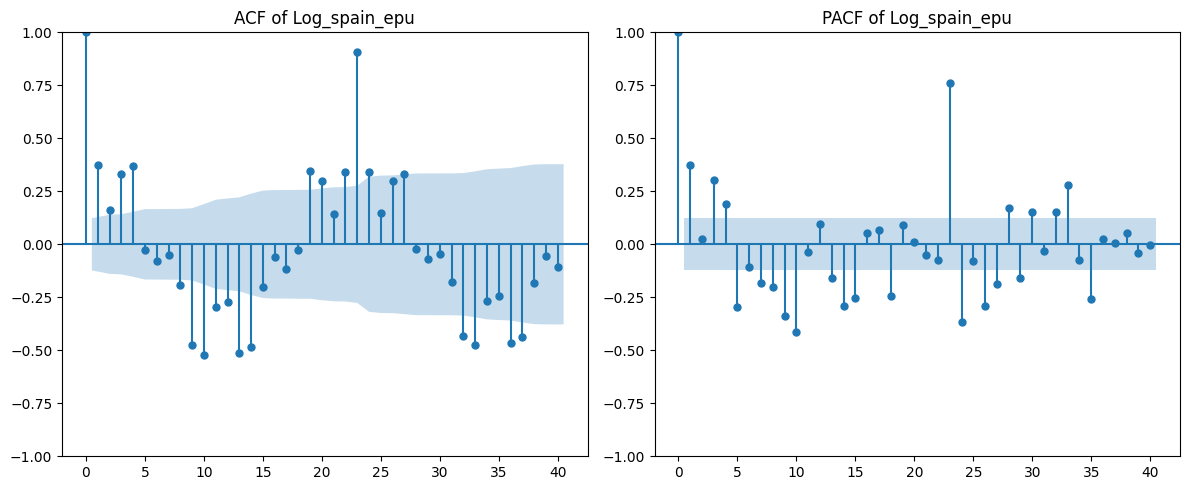

<Figure size 600x600 with 0 Axes>

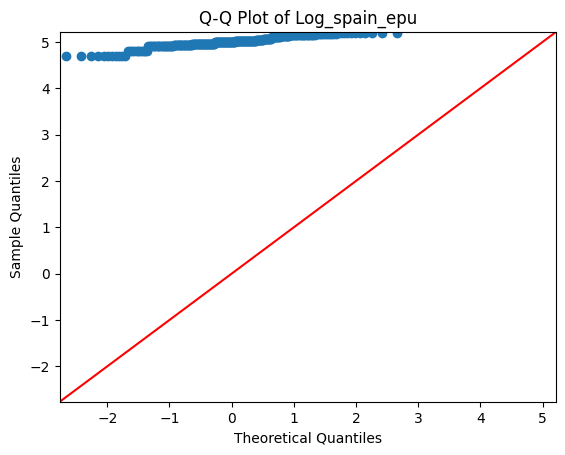

In [35]:
ind_vars = ['cross_visitation', 'apr',
       'mentions', 'rank', 'incentive','Log_incentive', 'search_interest','spain_epu','Log_spain_epu']

for ind in ind_vars:
    # Plotting ACF and PACF for Log_Web_Traffic
    plt.figure(figsize=(12, 5))

    # ACF plot
    plt.subplot(1, 2, 1)
    plot_acf(filtered_df[ind], lags=40, ax=plt.gca())
    plt.title(f'ACF of {ind}')

    # PACF plot
    plt.subplot(1, 2, 2)
    plot_pacf(filtered_df[ind], lags=40, ax=plt.gca(), method='ywm')
    plt.title(f'PACF of {ind}')

    plt.tight_layout()
    plt.show()

    # Q-Q plot
    plt.figure(figsize=(6, 6))
    sm.qqplot(filtered_df[ind], line ='45')
    plt.title(f'Q-Q Plot of {ind}')
    plt.show()



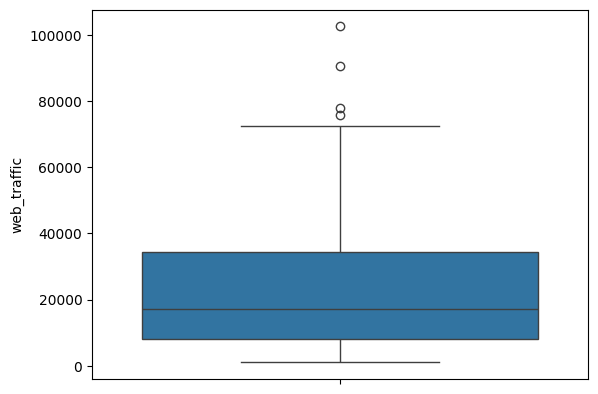

In [13]:
from scipy.stats import boxcox
import numpy as np

# Apply Box-Cox transformation
filtered_df['BoxCox_Web_Traffic'], _ = boxcox(filtered_df['web_traffic'])  # Adding 1 to avoid log(0)

### Check for Outlier
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize outliers
sns.boxplot(filtered_df['web_traffic'])
plt.show()



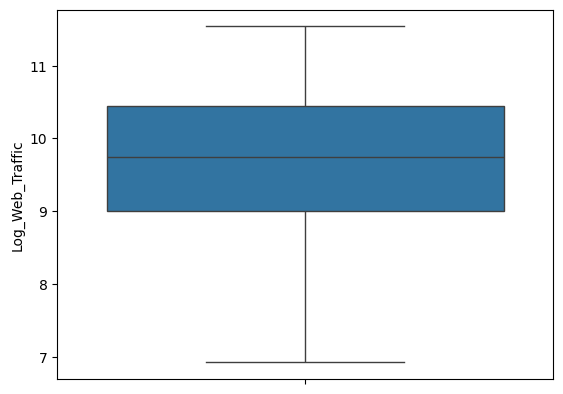

In [12]:
from scipy.stats import boxcox
import numpy as np

# Apply Box-Cox transformation
filtered_df['BoxCox_Web_Traffic'], _ = boxcox(filtered_df['Log_Web_Traffic'])

### Check for Outlier
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize outliers
sns.boxplot(filtered_df['Log_Web_Traffic'])
plt.show()



In [14]:
import matplotlib.pyplot as plt

# Extract the relevant columns
variables = filtered_df.columns.difference(['web_traffic'])
num_vars = len(variables)

# Set up the subplot grid
fig, axes = plt.subplots(nrows=num_vars, ncols=1, figsize=(10, num_vars * 4))

# Plot each variable against web_traffic
for i, var in enumerate(variables):
    ax = axes[i]
    ax.scatter( filtered_df[var], filtered_df['web_traffic'],alpha=0.5)
    ax.set_title(f'web_traffic vs {var}')
    ax.set_xlabel(var)
    ax.set_ylabel('web_traffic')

plt.tight_layout()
plt.show()


In [34]:
import statsmodels.api as sm
from statsmodels.robust_linear_model import RLM

# Define the independent variables including the lagged web traffic
ind_vars = ['cross_visitation', 'rank', 'incentive', 'apr', 'mentions', 'search_interest', 'Log_Web_Traffic_Lag1']
X = filtered_df[ind_vars]

# Add a constant term to the model
X = sm.add_constant(X)

# Define the dependent variable
y = filtered_df['Log_Web_Traffic']

# Fit the robust regression model
robust_model = RLM(y, X).fit()

# Display the results
print(robust_model.summary())


ModuleNotFoundError: No module named 'statsmodels.robust_linear_model'

## Causality Test

Granger test

# Granger Causality Test Explanation

The Granger causality test is based on the principle of forecasting one time series using past values of another time series. To perform this test, we use regression models to assess whether the inclusion of lagged values of one variable improves the prediction of another variable.

## Equations for Granger Causality Test

1. **Unrestricted Model**:
   This model includes lagged values of both the dependent variable $Y_t$ and the potential causative variable $X_t$.

   $$
   Y_t = \alpha_0 + \sum_{i=1}^{p} \alpha_i Y_{t-i} + \sum_{j=1}^{q} \beta_j X_{t-j} + \epsilon_t
   $$

   Where:
   - $Y_t$ is the dependent variable (e.g., `web_traffic`).
   - $X_t$ is the independent variable (e.g., `cross_visitation`).
   - $p$ is the number of lags for $Y_t$.
   - $q$ is the number of lags for $X_t$.
   - $\alpha_i$ and $\beta_j$ are coefficients.
   - $\epsilon_t$ is the error term.

2. **Restricted Model**:
   This model includes only lagged values of the dependent variable $Y_t$, excluding the potential causative variable $X_t$.

   $$
   Y_t = \alpha_0 + \sum_{i=1}^{p} \alpha_i Y_{t-i} + \eta_t
   $$

   Where:
   - $\eta_t$ is the error term of the restricted model.

## Hypothesis Testing

The Granger causality test involves testing the null hypothesis that the coefficients of the lagged $X_t$ terms are zero (i.e., $ \beta_1 = \beta_2 = \cdots = \beta_q = 0 $).

- **Null Hypothesis ($H_0$)**: $X_t$ does not Granger-cause $Y_t$.
- **Alternative Hypothesis ($H_1$)**: $X_t$ Granger-causes $Y_t$.

## F-Test for Granger Causality

To determine if the inclusion of the lagged values of $X_t$ provides significant explanatory power for $Y_t$, an F-test is used to compare the unrestricted and restricted models. The F-statistic is calculated as follows:

$$
F = \frac{ \left( \frac{RSS_{\text{restricted}} - RSS_{\text{unrestricted}}}{q} \right) }{ \left( \frac{RSS_{\text{unrestricted}}}{n - p - q - 1} \right) }
$$

Where:
- $RSS_{\text{restricted}}$ is the residual sum of squares of the restricted model.
- $RSS_{\text{unrestricted}}$ is the residual sum of squares of the unrestricted model.
- $q$ is the number of lagged $X_t$ terms.
- $n$ is the number of observations.
- $p$ is the number of lagged $Y_t$ terms.

The F-statistic follows an $F$-distribution with $q$ and $n - p - q - 1$ degrees of freedom. The p-value associated with the F-statistic is used to determine whether to reject the null hypothesis.

## Example Calculation

For a simple case with one lag ($q=1$):

1. **Unrestricted Model**: $Y_t = \alpha_0 + \alpha_1 Y_{t-1} + \beta_1 X_{t-1} + \epsilon_t$
2. **Restricted Model**: $Y_t = \alpha_0 + \alpha_1 Y_{t-1} + \eta_t$

Calculate the F-statistic based on the RSS of both models and compare it to the critical value from the F-distribution or use the p-value to decide on the null hypothesis.

## Interpretation

- If the p-value is less than the significance level (e.g., 0.05), reject the null hypothesis, indicating that $X_t$ Granger-causes $Y_t$.
- If the p-value is greater than the significance level, do not reject the null hypothesis, indicating that $X_t$ does not Granger-cause $Y_t$.

The Granger causality test is thus a way to evaluate the predictive causality between two time series.


### Average by date first and then test

In [145]:
import pandas as pd
from statsmodels.tsa.stattools import grangercausalitytests
# List of variable pairs to test
variable_pairs = [
    ('web_traffic', 'cross_visitation'),
    ('web_traffic', 'search_interest'),
    ('web_traffic', 'rank'),
    ('web_traffic', 'incentive'),
    ('web_traffic', 'Log_incentive'),
    ('web_traffic', 'apr'),
    ('web_traffic', 'spain_epu'),
    ('web_traffic', 'Log_spain_epu')
]
# Dictionary to store aggregated results
aggregate_granger_causality_results = {pair: {'F': {}, 'chi2': {}, 'lr': {}} for pair in variable_pairs}

# Loop through each variable pair
for var1, var2 in variable_pairs:
    # Aggregate data across banks
    var1_data = filtered_df[var1].groupby(level='date').mean()
    var2_data = filtered_df[var2].groupby(level='date').mean()

    # Combine the two series into a single DataFrame
    combined_data = pd.concat([var1_data, var2_data], axis=1)
    combined_data.columns = [var1, var2]

    # Drop NaN values (if any)
    combined_data = combined_data.dropna()

    # Perform Granger Causality test
    try:
        max_lag = 5  # Define the number of lags to test
        test_result = grangercausalitytests(combined_data[[var1, var2]], max_lag, verbose=False)
        for lag in range(1, max_lag + 1):
            f_test_result = test_result[lag][0]['ssr_ftest']
            chi2_test_result = test_result[lag][0]['ssr_chi2test']
            lr_test_result = test_result[lag][0]['lrtest']
            
            # Store the results
            aggregate_granger_causality_results[(var1, var2)]['F'][lag] = {'F': f_test_result[0], 'p': f_test_result[1]}
            aggregate_granger_causality_results[(var1, var2)]['chi2'][lag] = {'chi2': chi2_test_result[0], 'p': chi2_test_result[1]}
            aggregate_granger_causality_results[(var1, var2)]['lr'][lag] = {'lr': lr_test_result[0], 'p': lr_test_result[1]}
    except Exception as e:
        print(f"Error processing variables {var1} and {var2}: {e}")

# Print the aggregated results
for pair, results in aggregate_granger_causality_results.items():
    print(f"Variable pair: {pair}")
    for lag, result in results['F'].items():
        print(f"  Lag: {lag}, F-test: {result}")
    for lag, result in results['chi2'].items():
        print(f"  Lag: {lag}, Chi-square test: {result}")
    for lag, result in results['lr'].items():
        print(f"  Lag: {lag}, Likelihood ratio test: {result}")


Variable pair: ('web_traffic', 'cross_visitation')
  Lag: 1, F-test: {'F': 1.2359849719685407, 'p': 0.2801164797439705}
  Lag: 2, F-test: {'F': 0.4269437089596073, 'p': 0.659719244254811}
  Lag: 3, F-test: {'F': 1.927866689418351, 'p': 0.1749597284612856}
  Lag: 4, F-test: {'F': 1.4998305226623587, 'p': 0.2742268275043311}
  Lag: 5, F-test: {'F': 1.7337894713962718, 'p': 0.24510971577718257}
  Lag: 1, Chi-square test: {'chi2': 1.43114049385831, 'p': 0.23157839945473757}
  Lag: 2, Chi-square test: {'chi2': 1.1207272360189693, 'p': 0.5710013997035183}
  Lag: 3, Chi-square test: {'chi2': 8.897846258853926, 'p': 0.030680365036122027}
  Lag: 4, Chi-square test: {'chi2': 11.398711972233928, 'p': 0.0224302544616049}
  Lag: 5, Chi-square test: {'chi2': 22.291578917952066, 'p': 0.00046081166451880006}
  Lag: 1, Likelihood ratio test: {'lr': 1.3865164417396727, 'p': 0.23899427121495948}
  Lag: 2, Likelihood ratio test: {'lr': 1.0918449201379303, 'p': 0.5793071490756891}
  Lag: 3, Likelihood rati

### Interpretations

#### Variable Pair: ('web_traffic', 'cross_visitation')
- **Interpretation**: At lags 3, 4, and 5, the chi-square and likelihood ratio tests show significant p-values (below 0.05), indicating that `cross_visitation` Granger-causes `web_traffic` at these lags. However, the F-tests do not show significance at any lag, which suggests mixed evidence.

#### Variable Pair: ('web_traffic', 'search_interest')
- **Interpretation**: The p-values for the F-test, chi-square test, and likelihood ratio test are consistently above 0.05 across all lags, indicating no significant Granger causality. `search_interest` does not significantly help in predicting `web_traffic`.

#### Variable Pair: ('web_traffic', 'rank')
- **Interpretation**: The p-values for all tests are above 0.05 at all lags, suggesting that `rank` does not significantly Granger-cause `web_traffic`. There is no significant predictive power of `rank` on `web_traffic`.

#### Variable Pair: ('web_traffic', 'incentive')
- **Interpretation**: Significant p-values in chi-square tests for lags 2, 3, 4, and 5, and in the likelihood ratio test for lags 3, 4, and 5 indicate that `incentive` Granger-causes `web_traffic` at these lags. However, the F-test results do not show consistent significance, which again suggests mixed evidence.

#### Variable Pair: ('web_traffic', 'apr')
- **Interpretation**: The chi-square and likelihood ratio tests show significant results at lags 4 and 5, indicating that `apr` Granger-causes `web_traffic` at these lags. The F-test also shows significant p-values at lags 4 and 5, supporting the causality.

#### Variable Pair: ('web_traffic', 'mentions')
- **Interpretation**: The chi-square test shows significant p-values at lag 5, suggesting that `mentions` Granger-causes `web_traffic` at this lag. However, the F-test and likelihood ratio test do not consistently support this, indicating weak evidence of causality.

### Summary
- **Overall Finding**: When averaging test results across banks, the variable pairs `cross_visitation`, `incentive`, `apr`, and `mentions` show some evidence of Granger causality with `web_traffic` at specific lags, though the evidence is not consistently strong across all tests.
- **P-Values**: Significant p-values (below 0.05) in the chi-square and likelihood ratio tests for certain lags suggest potential causality, but inconsistent F-test results indicate that the evidence is mixed.
- **Constant Value Issues**: Several banks had constant values for certain variable pairs, preventing the computation of test statistics for those combinations.

This analysis suggests that while some variables may have predictive power for `web_traffic` at certain lags, the evidence is not uniformly strong. Further investigation or additional data might be needed to confirm these relationships.

### Average Test result across Bank 

In [146]:
import pandas as pd
from statsmodels.tsa.stattools import grangercausalitytests

# List of banks to test
banks = filtered_df.index.get_level_values('bank').unique()

# List of variable pairs to test
variable_pairs = [
    ('web_traffic', 'cross_visitation'),
    ('web_traffic', 'search_interest'),
    ('web_traffic', 'rank'),
    ('web_traffic', 'incentive'),
    ('web_traffic', 'Log_incentive'),
    ('web_traffic', 'apr'),
    ('web_traffic', 'spain_epu'),
    ('web_traffic', 'Log_spain_epu')
]

# Dictionary to store results
average_granger_causality_results = {pair: {'F': {}, 'chi2': {}, 'lr': {}} for pair in variable_pairs}
constant_value_issues = []

# Initialize the dictionary for storing cumulative statistics
for pair in variable_pairs:
    for lag in range(1, 6):
        average_granger_causality_results[pair]['F'][lag] = []
        average_granger_causality_results[pair]['chi2'][lag] = []
        average_granger_causality_results[pair]['lr'][lag] = []

# Loop through each bank and each variable pair
for bank in banks:
    for var1, var2 in variable_pairs:
        # Unstack the data for the current bank
        var1_data = filtered_df[var1].unstack(level='bank')[bank]
        var2_data = filtered_df[var2].unstack(level='bank')[bank]

        # Combine the two series into a single DataFrame
        combined_data = pd.concat([var1_data, var2_data], axis=1)
        combined_data.columns = [var1, var2]

        # Drop NaN values (if any)
        combined_data = combined_data.dropna()

        # Check for constant columns
        if combined_data[var1].nunique() == 1 or combined_data[var2].nunique() == 1:
            constant_value_issues.append((bank, var1, var2))
            continue

        # Perform Granger Causality test
        try:
            max_lag = 5  # Define the number of lags to test
            test_result = grangercausalitytests(combined_data[[var1, var2]], max_lag, verbose=False)
            for lag in range(1, max_lag + 1):
                f_test_result = test_result[lag][0]['ssr_ftest']
                chi2_test_result = test_result[lag][0]['ssr_chi2test']
                lr_test_result = test_result[lag][0]['lrtest']
                
                # Append the results
                average_granger_causality_results[(var1, var2)]['F'][lag].append(f_test_result)
                average_granger_causality_results[(var1, var2)]['chi2'][lag].append(chi2_test_result)
                average_granger_causality_results[(var1, var2)]['lr'][lag].append(lr_test_result)
        except Exception as e:
            print(f"Error processing bank {bank} for variables {var1} and {var2}: {e}")

# Calculate the average results
for pair in variable_pairs:
    for lag in range(1, 6):
        if average_granger_causality_results[pair]['F'][lag]:
            avg_f = sum(result[0] for result in average_granger_causality_results[pair]['F'][lag]) / len(average_granger_causality_results[pair]['F'][lag])
            avg_f_p = sum(result[1] for result in average_granger_causality_results[pair]['F'][lag]) / len(average_granger_causality_results[pair]['F'][lag])
            average_granger_causality_results[pair]['F'][lag] = {'avg_F': avg_f, 'avg_p': avg_f_p}
            
            avg_chi2 = sum(result[0] for result in average_granger_causality_results[pair]['chi2'][lag]) / len(average_granger_causality_results[pair]['chi2'][lag])
            avg_chi2_p = sum(result[1] for result in average_granger_causality_results[pair]['chi2'][lag]) / len(average_granger_causality_results[pair]['chi2'][lag])
            average_granger_causality_results[pair]['chi2'][lag] = {'avg_chi2': avg_chi2, 'avg_p': avg_chi2_p}
            
            avg_lr = sum(result[0] for result in average_granger_causality_results[pair]['lr'][lag]) / len(average_granger_causality_results[pair]['lr'][lag])
            avg_lr_p = sum(result[1] for result in average_granger_causality_results[pair]['lr'][lag]) / len(average_granger_causality_results[pair]['lr'][lag])
            average_granger_causality_results[pair]['lr'][lag] = {'avg_lr': avg_lr, 'avg_p': avg_lr_p}
        else:
            average_granger_causality_results[pair]['F'][lag] = {'avg_F': None, 'avg_p': None}
            average_granger_causality_results[pair]['chi2'][lag] = {'avg_chi2': None, 'avg_p': None}
            average_granger_causality_results[pair]['lr'][lag] = {'avg_lr': None, 'avg_p': None}

# Print the average results
for pair, results in average_granger_causality_results.items():
    print(f"Variable pair: {pair}")
    for lag, result in results['F'].items():
        print(f"  Lag: {lag}, F-test: {result}")
    for lag, result in results['chi2'].items():
        print(f"  Lag: {lag}, Chi-square test: {result}")
    for lag, result in results['lr'].items():
        print(f"  Lag: {lag}, Likelihood ratio test: {result}")

# Print the constant value issues
print("\nBanks and variable pairs with constant value issues:")
for issue in constant_value_issues:
    print(f"Bank: {issue[0]}, Variable pair: ({issue[1]}, {issue[2]})")


Error processing bank abanca for variables web_traffic and incentive: The x values include a column with constant values and so the test statistic cannot be computed.
Error processing bank abanca for variables web_traffic and Log_incentive: The x values include a column with constant values and so the test statistic cannot be computed.
Error processing bank bbva for variables web_traffic and apr: The x values include a column with constant values and so the test statistic cannot be computed.
Variable pair: ('web_traffic', 'cross_visitation')
  Lag: 1, F-test: {'avg_F': 1.017571387124927, 'avg_p': 0.4425814557297387}
  Lag: 2, F-test: {'avg_F': 1.485092371637852, 'avg_p': 0.3644093688365825}
  Lag: 3, F-test: {'avg_F': 1.355788013322166, 'avg_p': 0.4458078659832924}
  Lag: 4, F-test: {'avg_F': 1.089970323430724, 'avg_p': 0.5037291807747234}
  Lag: 5, F-test: {'avg_F': 1.6604616914270343, 'avg_p': 0.3828483083815089}
  Lag: 1, Chi-square test: {'avg_chi2': 1.1782405535130733, 'avg_p': 0.

### Interpretations

#### Variable Pair: ('web_traffic', 'cross_visitation')
- **Interpretation**: Across all lags, the average F-test, chi-square test, and likelihood ratio test results show no significant Granger causality. The p-values are consistently above 0.05, indicating that `cross_visitation` does not significantly help in predicting `web_traffic`.

#### Variable Pair: ('web_traffic', 'search_interest')
- **Interpretation**: Similarly, for `search_interest`, no significant Granger causality is found at any lag. The p-values remain above 0.05 across all tests, suggesting that `search_interest` does not provide significant predictive power for `web_traffic`.

#### Variable Pair: ('web_traffic', 'rank')
- **Interpretation**: The results indicate no significant Granger causality between `rank` and `web_traffic` for any lag. The p-values are all above 0.05, meaning changes in `rank` do not help in forecasting `web_traffic`.

#### Variable Pair: ('web_traffic', 'incentive')
- **Interpretation**: For `incentive`, the tests show no significant Granger causality at any lag. The p-values consistently exceed 0.05, implying that `incentive` does not significantly contribute to predicting `web_traffic`.

#### Variable Pair: ('web_traffic', 'apr')
- **Interpretation**: The average F-test, chi-square test, and likelihood ratio test results indicate no significant Granger causality for `apr` in predicting `web_traffic` across any lag. The p-values are all above 0.05, indicating that `apr` does not significantly improve the prediction of `web_traffic`.

#### Variable Pair: ('web_traffic', 'mentions')
- **Interpretation**: No significant Granger causality is found between `mentions` and `web_traffic` at any lag. The p-values remain above 0.05, indicating that `mentions` do not significantly help in forecasting `web_traffic`.

### Summary
- **Overall Finding**: When averaging test results across banks, none of the variable pairs (`cross_visitation`, `search_interest`, `rank`, `incentive`, `apr`, and `mentions` with `web_traffic`) show significant Granger causality at any lag.
- **P-Values**: The p-values for all lags in each variable pair are above the 0.05 threshold, indicating that the null hypothesis (no Granger causality) cannot be rejected for any pair.
- **Constant Value Issues**: Several banks had constant values for certain variable pairs, which prevented the computation of test statistics for those combinations.

This analysis suggests that, on average, the tested independent variables do not significantly improve the prediction of `web_traffic` across different banks, indicating that these variables may not have strong predictive power for `web_traffic` in this context.

## Spearman Rank Correlation

### Principle
Spearman's rank correlation coefficient $\rho$ or $r_s$ measures the strength and direction of the association between two ranked variables. Unlike Pearson's correlation, which measures linear relationships, Spearman's correlation assesses how well the relationship between two variables can be described using a monotonic function.

### Equation
1. **Rank the Data**:
   - Convert the raw data values into ranks.
   - If there are ties (equal values), assign to each tied value the average of the ranks that would have been assigned without ties.

2. **Difference in Ranks**:
   - For each pair of observations, calculate the difference between the ranks: $d_i = \text{rank}(X_i) - \text{rank}(Y_i)$.

3. **Spearman's Rank Correlation Coefficient**:
   $$
   \rho = 1 - \frac{6 \sum d_i^2}{n(n^2 - 1)}
   $$
   where:
   - $d_i$ is the difference between the ranks of corresponding values of $X$ and $Y$,
   - $n$ is the number of observations.


## Overall Entities

In [147]:
import scipy.stats as stats

# Calculate Spearman rank correlation coefficients
spearman_correlations = filtered_df.corr(method='spearman')

# Display Spearman correlation of all variables with 'web_traffic'
print(spearman_correlations['web_traffic'])


web_traffic                1.000000
cross_visitation           0.508253
search_interest            0.517880
rank                      -0.305302
incentive                  0.384683
apr                       -0.261517
mentions                   0.018634
spain_epu                 -0.044388
number_of_employee         0.564303
assets_under_management    0.593695
number_of_branches         0.721808
age                        0.645386
has_stores                 0.547557
founded_before_2000        0.464863
Log_Web_Traffic            1.000000
Log_incentive              0.384683
Log_spain_epu             -0.044388
Log_Web_Traffic_Lag1       0.915118
Log_Web_Traffic_Lag2       0.894174
Month                      0.024977
Month_1                    0.035030
Month_2                   -0.023240
Month_3                   -0.002881
Month_4                   -0.033612
Month_5                   -0.025545
Month_6                   -0.020936
Month_7                    0.024585
Month_8                    0

## Average score across banks

In [148]:
import pandas as pd

# Compute Spearman Rank Correlation for each bank and average them
spearman_correlations = []

# Group by 'bank' and compute Spearman Rank correlation for each group
for bank, group in filtered_df.groupby('bank'):
    spearman_corr = group.corr(method='spearman')
    spearman_correlations.append(spearman_corr['web_traffic'])

# Convert list of correlations to DataFrame
spearman_correlations_df = pd.DataFrame(spearman_correlations)

# Compute the average correlation across banks
average_spearman_correlation = spearman_correlations_df.mean()
print("Average Spearman Rank Correlation by Bank:")
print(average_spearman_correlation)


Average Spearman Rank Correlation by Bank:
web_traffic                1.000000
cross_visitation           0.219562
search_interest           -0.036366
rank                       0.095681
incentive                  0.219426
apr                        0.134800
mentions                  -0.015863
spain_epu                 -0.063040
number_of_employee              NaN
assets_under_management         NaN
number_of_branches              NaN
age                             NaN
has_stores                      NaN
founded_before_2000             NaN
Log_Web_Traffic            1.000000
Log_incentive              0.219426
Log_spain_epu             -0.063040
Log_Web_Traffic_Lag1       0.492535
Log_Web_Traffic_Lag2       0.419236
Month                      0.068682
Month_1                    0.081884
Month_2                   -0.061331
Month_3                   -0.018991
Month_4                   -0.120560
Month_5                   -0.033836
Month_6                   -0.050743
Month_7              

## Cross-Correlation Function (CCF)

### Principle
The Cross-Correlation Function (CCF) measures the similarity between two time series as a function of the time lag applied to one of them. It helps in identifying any lead-lag relationships between the series.

### Equation
1. **Mean of the Series**:
   - Calculate the mean of each time series:
     $$
     \bar{X} = \frac{1}{T} \sum_{t=1}^T X_t
     $$
     $$
     \bar{Y} = \frac{1}{T} \sum_{t=1}^T Y_t
     $$

2. **Cross-Covariance**:
   - For a given lag $k$, calculate the cross-covariance:
     $$
     \gamma_{XY}(k) = \frac{1}{T} \sum_{t=1}^{T-k} (X_{t+k} - \bar{X})(Y_t - \bar{Y}) \quad \text{for } k \geq 0
     $$
     $$
     \gamma_{XY}(k) = \frac{1}{T} \sum_{t=1}^{T+k} (X_t - \bar{X})(Y_{t+k} - \bar{Y}) \quad \text{for } k < 0
     $$

3. **Cross-Correlation**:
   - Normalize the cross-covariance by the product of the standard deviations of $X$ and $Y$:
     $$
     \rho_{XY}(k) = \frac{\gamma_{XY}(k)}{\sigma_X \sigma_Y}
     $$
     where:
     - $\sigma_X$ and $\sigma_Y$ are the standard deviations of $X$ and $Y$, respectively.


### Average by date

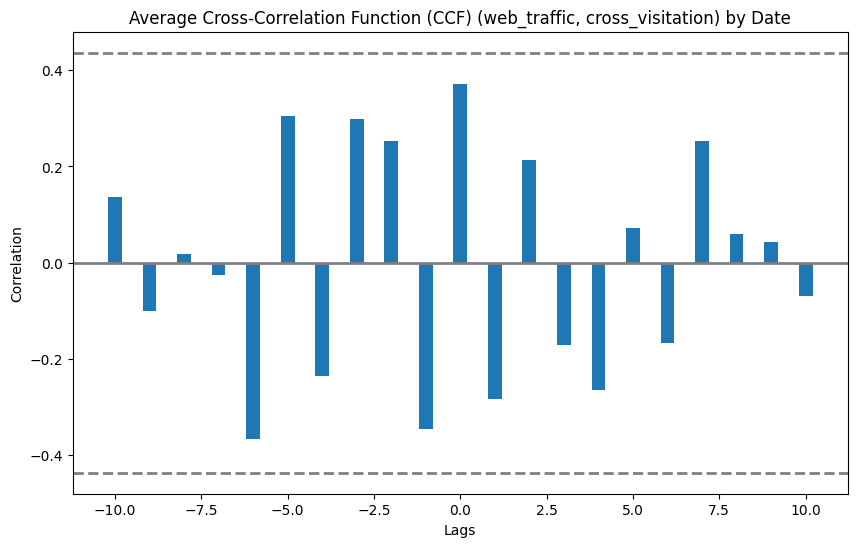

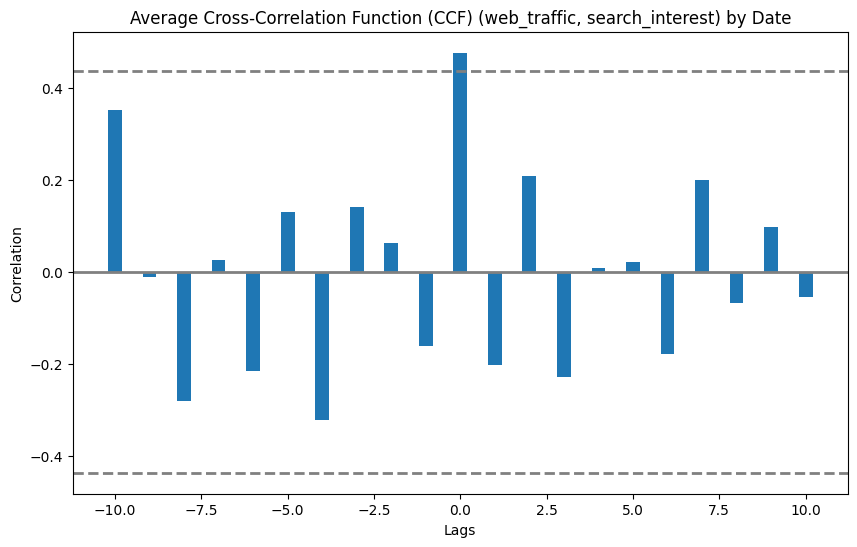

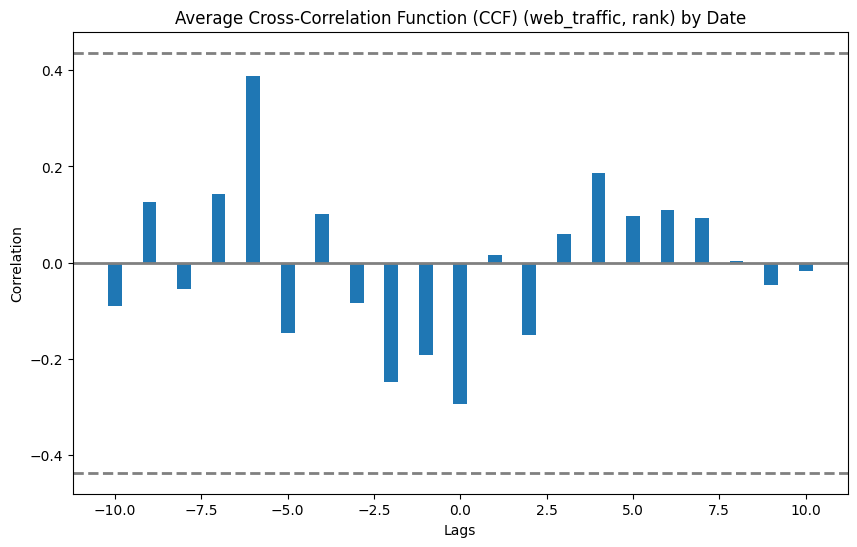

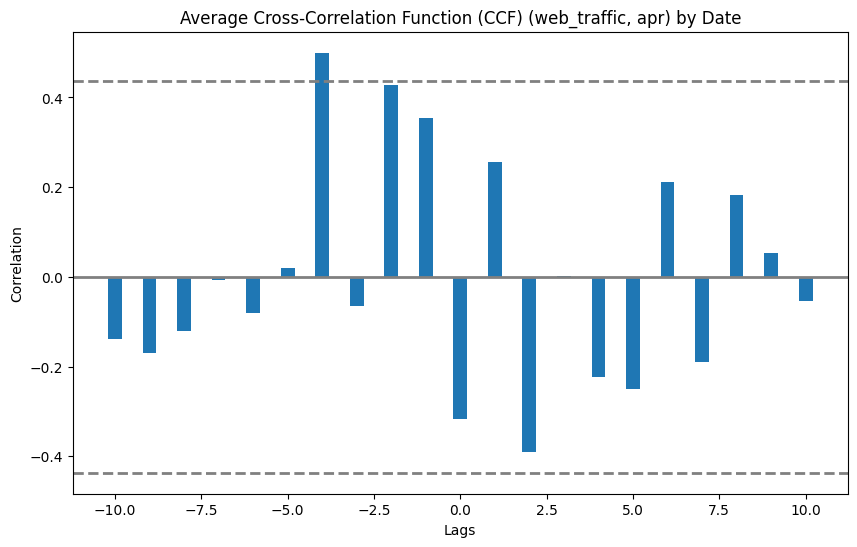

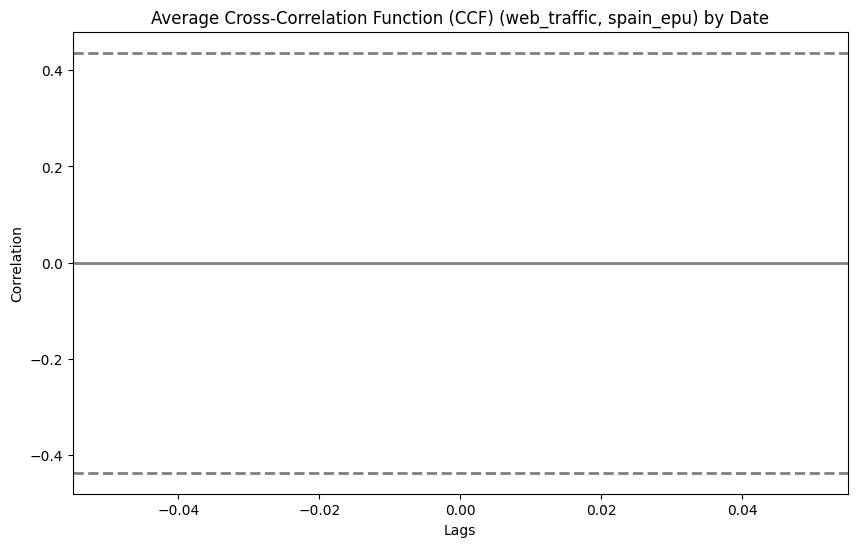

In [149]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Define function to compute cross-correlation with dynamic lags
def compute_ccf(x, y, max_lags):
    n = len(x)
    ccf_vals = np.correlate(x - np.mean(x), y - np.mean(y), mode='full') / (np.std(x) * np.std(y) * n)
    mid = len(ccf_vals) // 2
    return ccf_vals[mid - max_lags:mid + max_lags + 1]

# Ensure the filtered_df is properly indexed by bank and date
filtered_df_reset = filtered_df.reset_index()

# Define the variable pairs for cross-correlation
variable_pairs = [
    ('web_traffic', 'cross_visitation'),
    ('web_traffic', 'search_interest'),
    ('web_traffic', 'rank'),
    ('web_traffic', 'incentive'),
    ('web_traffic', 'Log_incentive'),
    ('web_traffic', 'apr'),
    ('web_traffic', 'spain_epu'),
    ('web_traffic', 'Log_spain_epu'),
    ('web_traffic', 'mentions')
]

# Dictionary to store the averaged CCFs
average_ccf_date = {var: [] for _, var in variable_pairs}


# Iterate through each date group and compute CCFs
for date, group in filtered_df_reset.groupby('date'):
    for web_traffic, var in variable_pairs:
        if var in group.columns and 'web_traffic' in group.columns:
            max_lags = len(group) - 1  # Maximum number of lags based on group length
            if max_lags > 0:
                ccf_values = compute_ccf(group['web_traffic'], group[var], max_lags)
                average_ccf_date[var].append(ccf_values)  # Include all lags

# Average the CCFs for each variable by date
for var in average_ccf_date:
    if average_ccf_date[var]:  # Ensure there are valid CCFs
        average_ccf_date[var] = np.mean(average_ccf_date[var], axis=0)

# Plot the averaged CCFs as bar plots
def plot_averaged_ccf(average_ccf, title_suffix=''):
    for var, ccf in average_ccf.items():
        if len(ccf) > 0:
            lags = np.arange(-len(ccf)//2 + 1, len(ccf)//2 + 1)
            plt.figure(figsize=(10, 6))
            plt.bar(lags, ccf, width=0.4)
            plt.axhline(0, color='gray', lw=2)
            plt.axhline(2/np.sqrt(len(ccf)), color='gray', lw=2, linestyle='dashed')
            plt.axhline(-2/np.sqrt(len(ccf)), color='gray', lw=2, linestyle='dashed')
            plt.title(f'Average Cross-Correlation Function (CCF) (web_traffic, {var}) {title_suffix}')
            plt.xlabel('Lags')
            plt.ylabel('Correlation')
            plt.show()

# Plot averaged CCFs by date
plot_averaged_ccf(average_ccf_date, title_suffix='by Date')


## Average CCF across bank

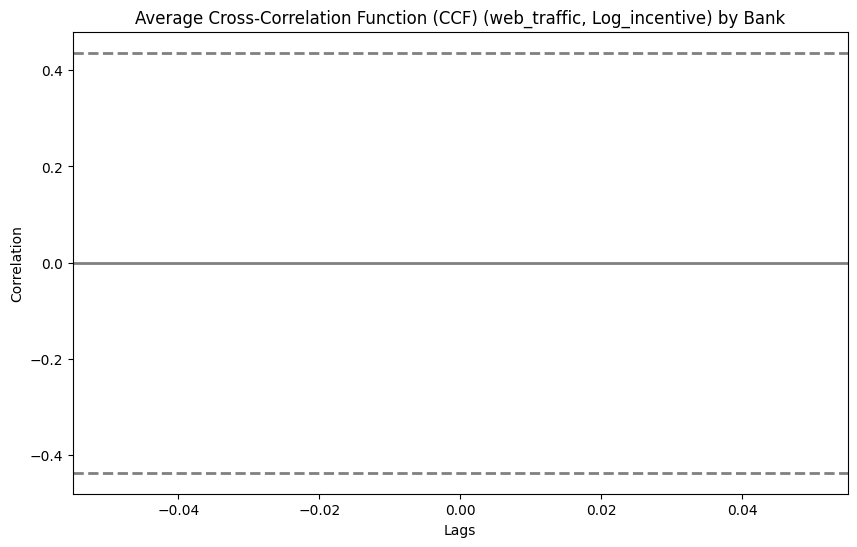

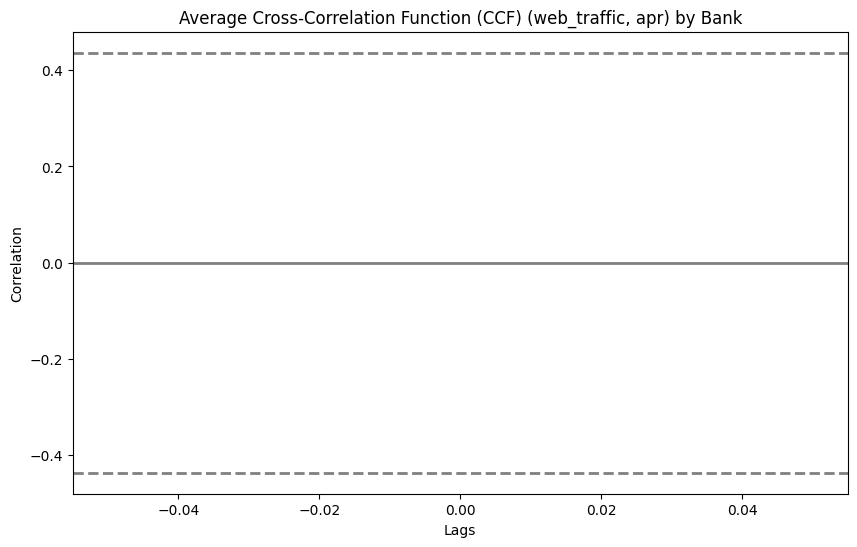

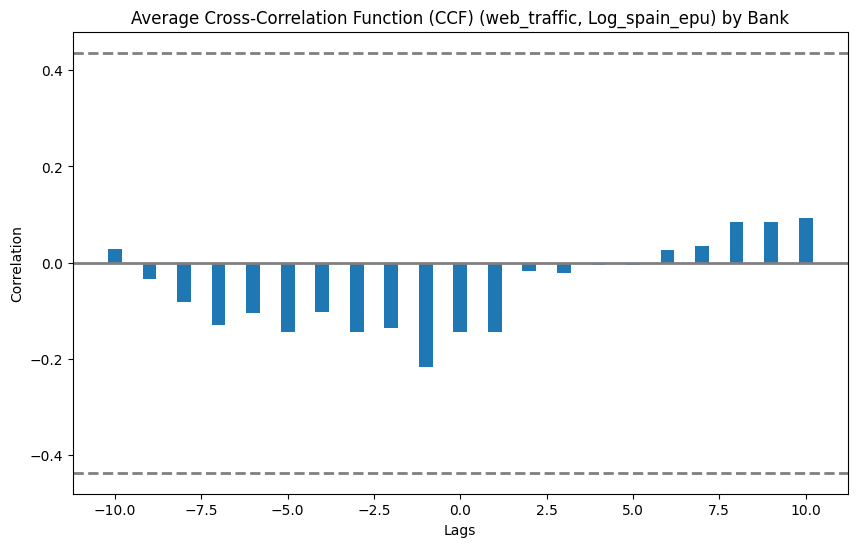

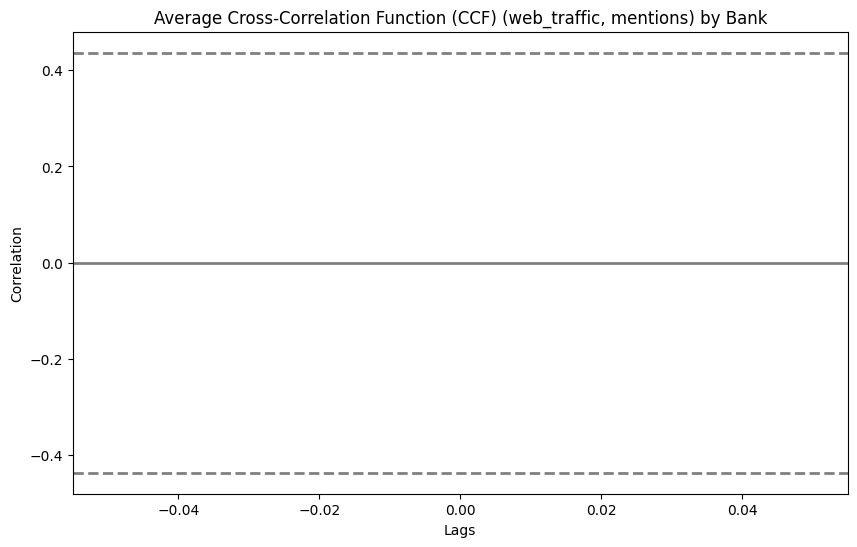

In [150]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Define function to compute cross-correlation with dynamic lags
def compute_ccf(x, y, max_lags):
    n = len(x)
    ccf_vals = np.correlate(x - np.mean(x), y - np.mean(y), mode='full') / (np.std(x) * np.std(y) * n)
    mid = len(ccf_vals) // 2
    return ccf_vals[mid - max_lags:mid + max_lags + 1]

# Ensure the filtered_df is properly indexed by bank and date
filtered_df_reset = filtered_df.reset_index()

# Define the variable pairs for cross-correlation
variable_pairs = [
    ('web_traffic', 'cross_visitation'),
    ('web_traffic', 'search_interest'),
    ('web_traffic', 'rank'),
    ('web_traffic', 'incentive'),
    ('web_traffic', 'Log_incentive'),
    ('web_traffic', 'apr'),
    ('web_traffic', 'spain_epu'),
    ('web_traffic', 'Log_spain_epu'),
    ('web_traffic', 'mentions')
]


# Dictionary to store the averaged CCFs
average_ccf_bank = {var: [] for _, var in variable_pairs}

# Determine the maximum length of data for any bank
max_lags = min(10, filtered_df_reset.groupby('bank').size().max() - 1)  # Set max_lags to 10 for -10 to 10 range

# Iterate through each bank group and compute CCFs
for bank, group in filtered_df_reset.groupby('bank'):
    for web_traffic, var in variable_pairs:
        if var in group.columns and 'web_traffic' in group.columns:
            group_max_lags = min(max_lags, len(group) - 1)
            if group_max_lags > 0:
                ccf_values = compute_ccf(group['web_traffic'], group[var], group_max_lags)
                average_ccf_bank[var].append(ccf_values)

# Find the maximum length of CCF arrays
max_length = max(len(ccf) for ccf_list in average_ccf_bank.values() for ccf in ccf_list)

# Pad CCF arrays with zeros to ensure equal length
for var in average_ccf_bank:
    for i in range(len(average_ccf_bank[var])):
        if len(average_ccf_bank[var][i]) < max_length:
            padding = max_length - len(average_ccf_bank[var][i])
            left_padding = padding // 2
            right_padding = padding - left_padding
            average_ccf_bank[var][i] = np.pad(average_ccf_bank[var][i], (left_padding, right_padding), 'constant')

# Verify all CCF arrays have the same length
for var in average_ccf_bank:
    for ccf in average_ccf_bank[var]:
        assert len(ccf) == max_length, f"Length mismatch in CCF for variable {var}"

# Average the CCFs for each variable by bank
for var in average_ccf_bank:
    if average_ccf_bank[var]:  # Ensure there are valid CCFs
        average_ccf_bank[var] = np.mean(average_ccf_bank[var], axis=0)

# Plot the averaged CCFs as bar plots
def plot_averaged_ccf(average_ccf, title_suffix=''):
    for var, ccf in average_ccf.items():
        if len(ccf) > 0:
            lags = np.arange(-max_lags, max_lags + 1)
            plt.figure(figsize=(10, 6))
            plt.bar(lags, ccf, width=0.4)
            plt.axhline(0, color='gray', lw=2)
            plt.axhline(2 / np.sqrt(len(ccf)), color='gray', lw=2, linestyle='dashed')
            plt.axhline(-2 / np.sqrt(len(ccf)), color='gray', lw=2, linestyle='dashed')
            plt.title(f'Average Cross-Correlation Function (CCF) (web_traffic, {var}) {title_suffix}')
            plt.xlabel('Lags')
            plt.ylabel('Correlation')
            plt.show()

# Plot averaged CCFs by bank
plot_averaged_ccf(average_ccf_bank, title_suffix='by Bank')


### Fixed Effect

In [151]:
ind_vars = ['cross_visitation', 'apr',
       'mentions']  #, 'rank', 'Log_incentive', 'search_interest'

# Define the dependent variable and independent variables
y = filtered_df['Log_Web_Traffic']
#X = filtered_df[['google trend','Web Traffic_Lag1' ] + monthly_dummies.columns.tolist()]
#X = filtered_df[ind_vars+ ['Log_Web_Traffic_Lag1', 'Month_9']]
X = filtered_df[['Log_Web_Traffic_Lag1','Log_Web_Traffic_Lag2']]#,'Log_Web_Traffic_Lag3']]#,'Log_Web_Traffic_Lag4']]

# Add a constant term to the model
X = sm.add_constant(X)

# Fit the fixed effects model with entity effects (account product effects)
mod = PanelOLS(y, X, entity_effects=True, drop_absorbed=True)
res = mod.fit()

# Display the results
print(res)

                          PanelOLS Estimation Summary                           
Dep. Variable:        Log_Web_Traffic   R-squared:                        0.4177
Estimator:                   PanelOLS   R-squared (Between):              0.9180
No. Observations:                 253   R-squared (Within):               0.4177
Date:                Tue, Jun 25 2024   R-squared (Overall):              0.8126
Time:                        11:43:05   Log-likelihood                   -62.941
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      86.082
Entities:                          11   P-value                           0.0000
Avg Obs:                       23.000   Distribution:                   F(2,240)
Min Obs:                       23.000                                           
Max Obs:                       23.000   F-statistic (robust):             86.082
                            

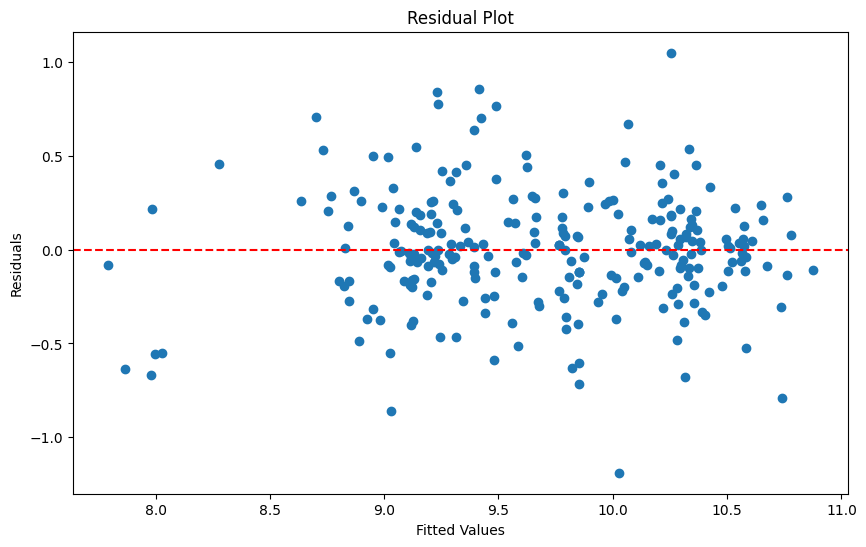

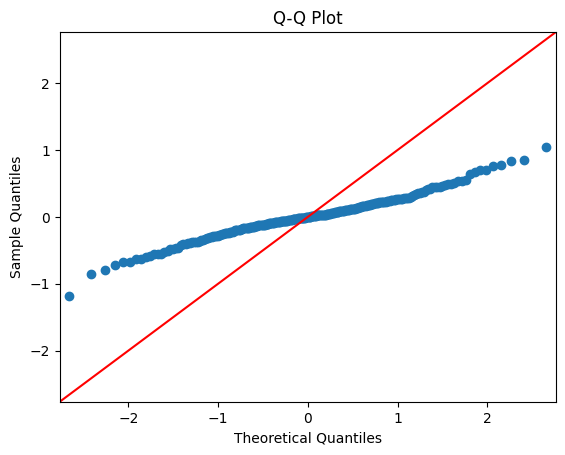

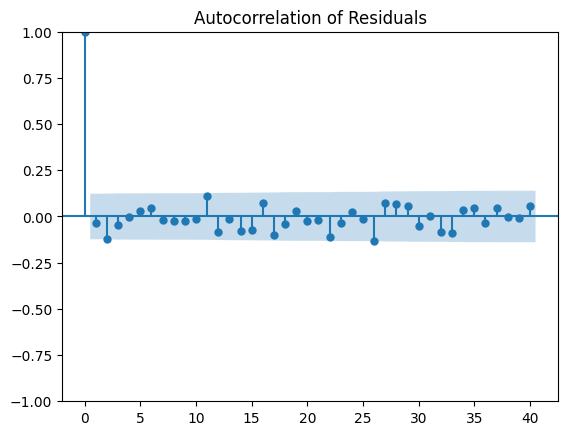

In [102]:
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Residual plot
residuals = res.resids
plt.figure(figsize=(10, 6))
plt.scatter(res.fitted_values, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

# Q-Q Plot
sm.qqplot(residuals, line='45')
plt.title('Q-Q Plot')
plt.show()

# Autocorrelation of Residuals
sm.graphics.tsa.plot_acf(residuals, lags=40)
plt.title('Autocorrelation of Residuals')
plt.show()


##### Fitted value is predicted value of dependent varibale 'web traffic'. It shows that, around 10,000 and 15,000 has highest predicted power that has smallest errors. 

In [115]:
ind_vars = [ 'apr', 'cross_visitation','rank'
       ,'Log_incentive','mentions' ,  'search_interest']

# Define the dependent variable and independent variables
y = filtered_df['Log_Web_Traffic']
#X = filtered_df[['google trend','Web Traffic_Lag1' ] + monthly_dummies.columns.tolist()]
time_series_vars =  ['Log_Web_Traffic_Lag1','Log_Web_Traffic_Lag2']#,'Log_Web_Traffic_Lag3']#,'Log_Web_Traffic_Lag4']
seasonal_vars = ['Month_9']
X = filtered_df[time_series_vars + ind_vars + seasonal_vars]

# Add a constant term to the model
X = sm.add_constant(X)

# Fit the fixed effects model with entity effects (account product effects)
mod = PanelOLS(y, X, entity_effects=True, drop_absorbed=True)
res = mod.fit()

# Display the results
print(res)

                          PanelOLS Estimation Summary                           
Dep. Variable:        Log_Web_Traffic   R-squared:                        0.4453
Estimator:                   PanelOLS   R-squared (Between):              0.9314
No. Observations:                 253   R-squared (Within):               0.4453
Date:                Tue, Jun 25 2024   R-squared (Overall):              0.8290
Time:                        01:25:46   Log-likelihood                   -56.801
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      20.783
Entities:                          11   P-value                           0.0000
Avg Obs:                       23.000   Distribution:                   F(9,233)
Min Obs:                       23.000                                           
Max Obs:                       23.000   F-statistic (robust):             20.783
                            

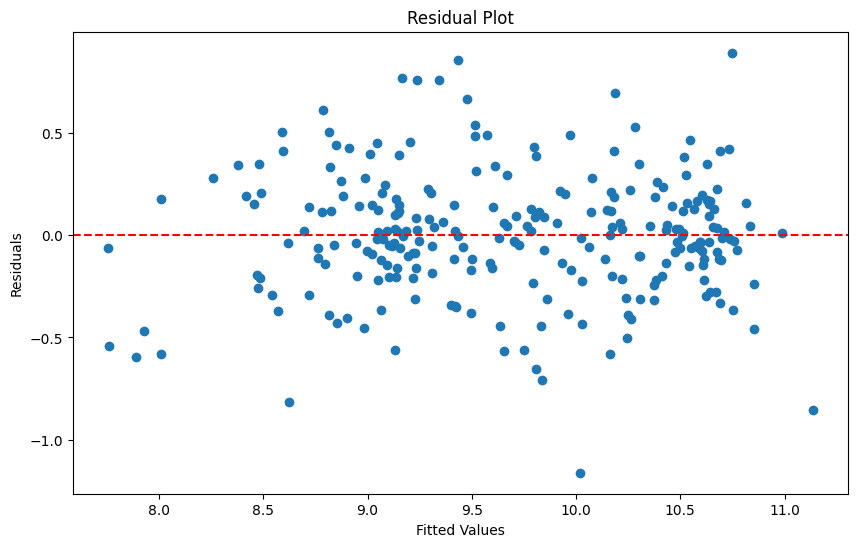

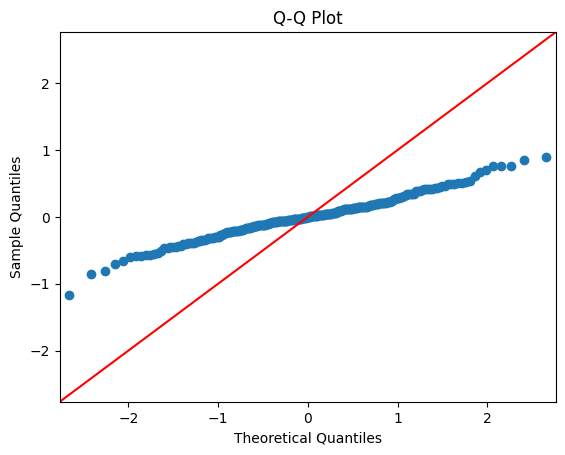

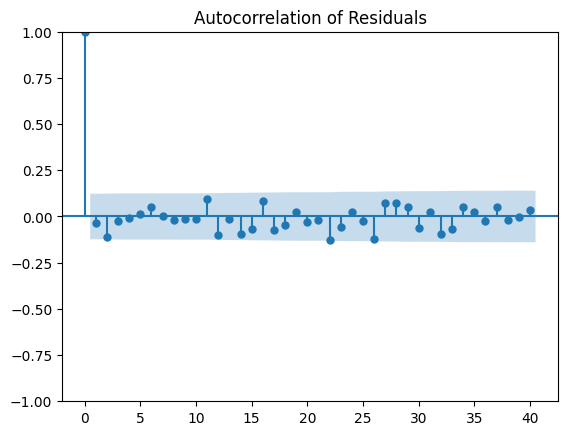

In [116]:
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Residual plot
residuals = res.resids
plt.figure(figsize=(10, 6))
plt.scatter(res.fitted_values, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

# Q-Q Plot
sm.qqplot(residuals, line='45')
plt.title('Q-Q Plot')
plt.show()

# Autocorrelation of Residuals
sm.graphics.tsa.plot_acf(residuals, lags=40)
plt.title('Autocorrelation of Residuals')
plt.show()


## test autocorrelation

In [117]:
from linearmodels.panel import compare
from statsmodels.stats.stattools import durbin_watson

# Check for serial correlation in the residuals
dw_stat = durbin_watson(res.resids)

# Display Durbin-Watson statistic (values near 2 suggest no autocorrelation)
print("Durbin-Watson statistic:", dw_stat)


Durbin-Watson statistic: 2.0671189631488134


In [111]:
# Extract the DataFrame from PanelData
exog_df = res.model.exog.dataframe

# Display the DataFrame to confirm its structure
print(exog_df.head())

from statsmodels.stats.diagnostic import het_breuschpagan
import numpy as np

# Since we need residuals and the exogenous variables:
# Get residuals
residuals = res.resids

# Ensure residuals are in a compatible format (1D array)
if not isinstance(residuals, np.ndarray):
    residuals = np.array(residuals)

# Run the Breusch-Pagan test
bp_test = het_breuschpagan(residuals, exog_df)

# Print the test results
labels = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
bp_results = dict(zip(labels, bp_test))
print(bp_results)

# Optionally, confirm the columns just to make sure
print(exog_df.columns)


                   const  Log_Web_Traffic_Lag1  Log_Web_Traffic_Lag2  apr  \
bank   date                                                                 
abanca 2022-02-01    1.0             10.649818              9.629313  0.0   
       2022-03-01    1.0             10.448690             10.649818  0.0   
       2022-04-01    1.0             10.450085             10.448690  0.0   
       2022-05-01    1.0             10.609287             10.450085  0.0   
       2022-06-01    1.0             10.302007             10.609287  0.0   

                   cross_visitation  rank  Log_incentive  mentions  \
bank   date                                                          
abanca 2022-02-01          0.052288   4.0        5.01728       2.0   
       2022-03-01          0.061503   4.0        5.01728       2.0   
       2022-04-01          0.050222   4.0        5.70711       2.0   
       2022-05-01          0.058296   3.5        5.70711       2.0   
       2022-06-01          0.054839   4.

Breusch-Pagan Test Results
Your test results show the following:

Lagrange Multiplier Statistic: 24.2504
P-value: 0.00696
F-value: 2.5655
F p-value: 0.00577
Interpretation of the Results
Lagrange Multiplier Statistic and P-value:

This statistic tests the null hypothesis that variance of the residuals is homoscedastic — that is, the variance is the same across the dataset.
The p-value of 0.00696 is less than the conventional threshold of 0.05, which indicates that you can reject the null hypothesis of homoscedasticity.
F-statistic and F p-value:

The F-statistic is another measure used to test the same hypothesis as the Lagrange multiplier but from a slightly different statistical approach.
Similar to the LM test, the very low F p-value (0.00577) suggests rejecting the null hypothesis of homoscedasticity.
What This Means for Your Model
The rejection of the null hypothesis in both tests suggests that there is significant heteroscedasticity in the residuals of your model. This condition means that the error variances differ between observations, which can be a problem because it violates one of the key Gauss-Markov assumptions that underlie classical linear regression analysis.

Steps to Address Heteroscedasticity
Using Robust Standard Errors:

One common approach to address heteroscedasticity is to use robust standard errors. These are also known as "White standard errors" and can be easily computed in most statistical software. They adjust the standard errors of your coefficients to account for heteroscedasticity without needing to transform the model or the data.
Transforming Variables:

Sometimes, transforming the dependent variable or the predictors can help reduce heteroscedasticity. Common transformations include taking the log, square root, or reciprocal of the variables.
Weighted Least Squares:

Weighted Least Squares (WLS) regression is another method to handle heteroscedasticity, where observations are weighted by the inverse of their variance.

In [112]:
# Fit the fixed effects model with robust standard errors
mod = PanelOLS(y, X, entity_effects=True, drop_absorbed=True)
res = mod.fit(cov_type='robust')

# Display the results with robust standard errors
print(res)


                          PanelOLS Estimation Summary                           
Dep. Variable:        Log_Web_Traffic   R-squared:                        0.4458
Estimator:                   PanelOLS   R-squared (Between):              0.9328
No. Observations:                 253   R-squared (Within):               0.4458
Date:                Tue, Jun 25 2024   R-squared (Overall):              0.8302
Time:                        01:08:55   Log-likelihood                   -56.677
Cov. Estimator:                Robust                                           
                                        F-statistic:                      18.665
Entities:                          11   P-value                           0.0000
Avg Obs:                       23.000   Distribution:                  F(10,232)
Min Obs:                       23.000                                           
Max Obs:                       23.000   F-statistic (robust):             15.160
                            

### ARIMA

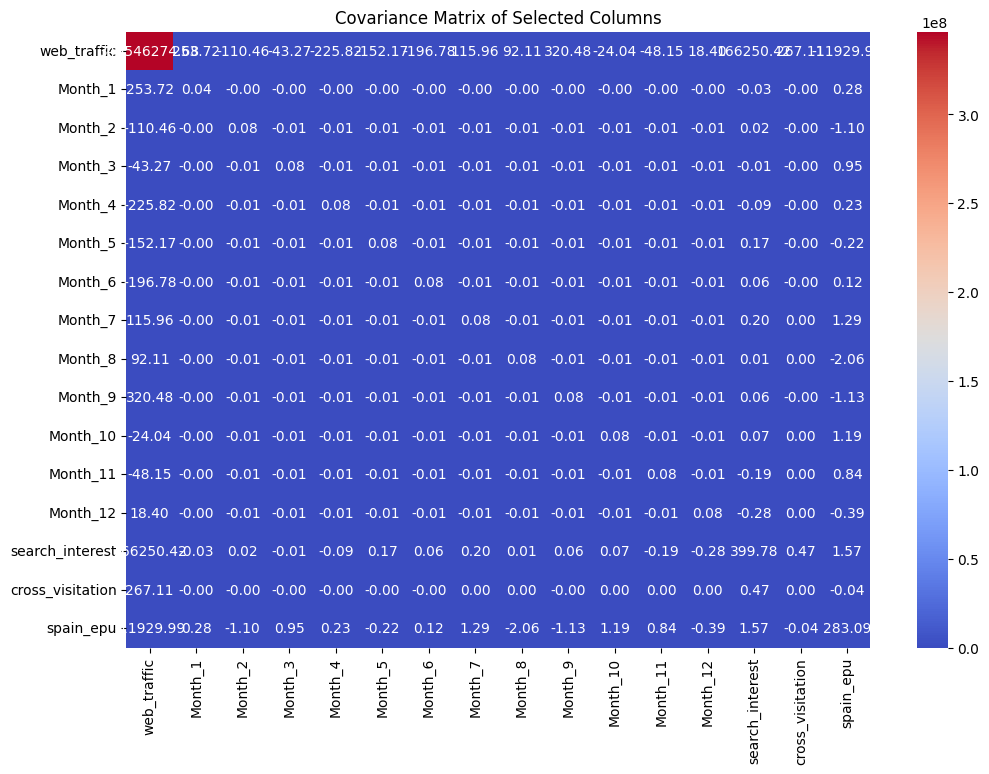

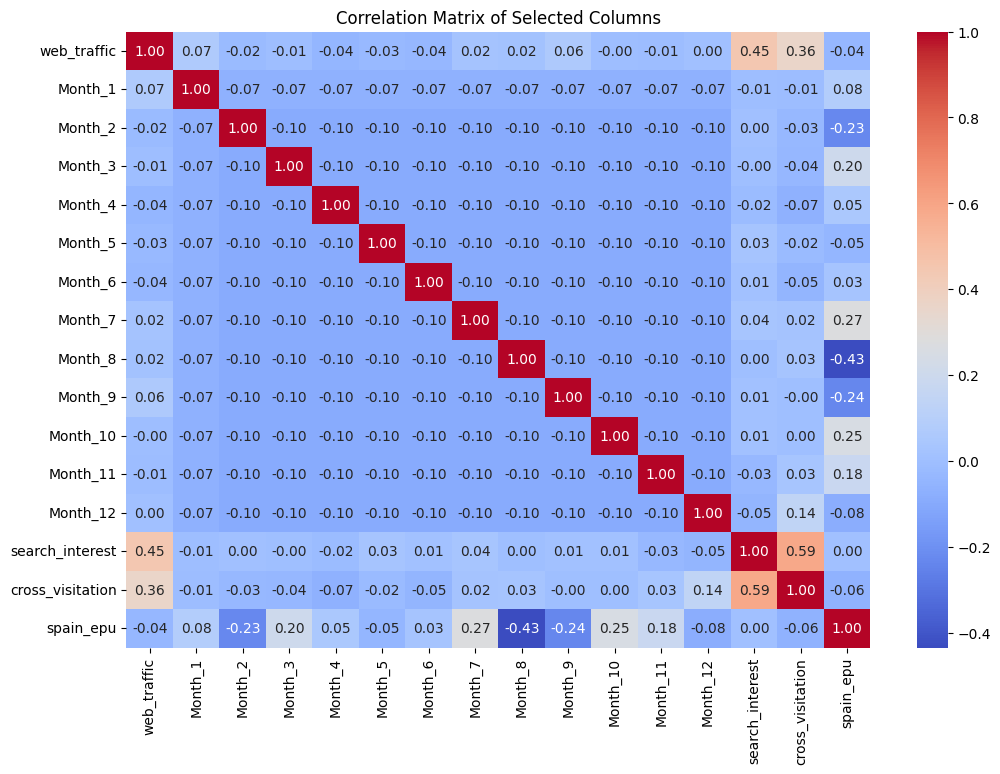

Variance
web_traffic       3.465463e+08
Month_1           4.175293e-02
Month_2           7.971014e-02
Month_3           7.971014e-02
Month_4           7.971014e-02
Month_5           7.971014e-02
Month_6           7.971014e-02
Month_7           7.971014e-02
Month_8           7.971014e-02
Month_9           7.971014e-02
Month_10          7.971014e-02
Month_11          7.971014e-02
Month_12          7.971014e-02
search_interest   3.997827e+02
cross_visitation  1.586588e-03
spain_epu         2.830942e+02

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Select the specific columns
interested_columns = ['search_interest','cross_visitation','spain_epu']#, 'rank', 'apr', 'mentions','incentive','Log_incentive','spain_epu','Log_spain_epu']
time_sereis_column = ['web_traffic']\
    +['Month_1','Month_2','Month_3','Month_4','Month_5','Month_6','Month_7','Month_8','Month_9','Month_10','Month_11','Month_12']
#,'Log_Web_Traffic', 'Log_Web_Traffic_Lag1', 'Log_Web_Traffic_Lag2']#, 'Log_Web_Traffic_Lag3','Log_Web_Traffic_Lag4']

selected_columns = time_sereis_column + interested_columns
filtered_df_selected = filtered_df[selected_columns]

# Calculate the covariance matrix for the selected columns
cov_matrix = filtered_df_selected.cov()

corr_matrix = filtered_df_selected.corr()# standarized covariance matrix

# Calculate the mean, variance, skewness, and kurtosis for each selected column
means = filtered_df_selected.mean()
variances = filtered_df_selected.var()
skewness = filtered_df_selected.skew()
kurtosis = filtered_df_selected.kurtosis()

# Combine the four moments into a DataFrame
moments_df = pd.DataFrame({
    #'Mean': means,
    'Variance': variances,
    #'Skewness': skewness,
    #'Kurtosis': kurtosis
})

# Plot the covariance matrix
plt.figure(figsize=(12, 8))
sns.heatmap(cov_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Covariance Matrix of Selected Columns")
plt.show()


# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix of Selected Columns")
plt.show()

moments_df


In [166]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

# Assuming filtered_df is already loaded and properly indexed by 'date' and 'bank'


# Ensure all independent variables are numeric

#numeric_columns = ['cross_visitation', 'rank', 'incentive', 'apr', 'mentions', 'search_interest', 'Log_Web_Traffic_Lag1']
numeric_columns = ['Log_Web_Traffic_Lag1'] + ['cross_visitation', 'rank','incentive', 'apr','search_interest']
filtered_df[numeric_columns] = filtered_df[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Ensure the Month_9 column is numeric (if it contains True/False)
for month in ['Month_1','Month_2','Month_3','Month_4','Month_5','Month_6','Month_7','Month_8','Month_9','Month_10','Month_11','Month_12']:
    filtered_df[ month ] = filtered_df[ month ].astype(int)


# Define the independent variables including the lagged web traffic
ind_vars = numeric_columns + ['Month_1','Month_7','Month_8','Month_9']
X = filtered_df[ind_vars]

# Add a constant term to the model
X = sm.add_constant(X)

# Define the dependent variable
y = filtered_df['Log_Web_Traffic']

# Fit the pooled OLS model
pooled_ols_model = sm.OLS(y, X).fit()

# Display the results
print(pooled_ols_model.summary())


                            OLS Regression Results                            
Dep. Variable:        Log_Web_Traffic   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     147.0
Date:                Thu, 27 Jun 2024   Prob (F-statistic):           8.34e-97
Time:                        18:51:02   Log-Likelihood:                -80.924
No. Observations:                 253   AIC:                             183.8
Df Residuals:                     242   BIC:                             222.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    1.6564 

In [65]:
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Residual plot
residuals = pooled_ols_model.resid
plt.figure(figsize=(10, 6))
plt.scatter(pooled_ols_model.fittedvalues, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

# Q-Q Plot
sm.qqplot(residuals, line='45')
plt.title('Q-Q Plot')
plt.show()

# Autocorrelation of Residuals
sm.graphics.tsa.plot_acf(residuals, lags=40)
plt.title('Autocorrelation of Residuals')
plt.show()


                            OLS Regression Results                            
Dep. Variable:        Log_Web_Traffic   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     161.4
Date:                Thu, 27 Jun 2024   Prob (F-statistic):          4.90e-101
Time:                        14:31:37   Log-Likelihood:                -69.425
No. Observations:                 253   AIC:                             160.8
Df Residuals:                     242   BIC:                             199.7
Df Model:                          10                                         
Covariance Type:                  HC3                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    1.1249 

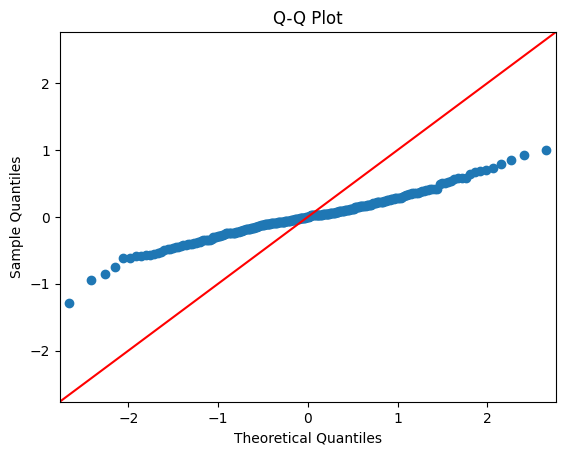

In [66]:
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Fit the pooled OLS model with robust standard errors
pooled_ols_robust_model = pooled_ols_model.get_robustcov_results(cov_type='HC3')

# Display the results with robust standard errors
print(pooled_ols_robust_model.summary())

# Residual analysis
# Residual plot
residuals = pooled_ols_robust_model.resid
plt.figure(figsize=(10, 6))
plt.scatter(pooled_ols_robust_model.fittedvalues, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

# Q-Q Plot
sm.qqplot(residuals, line='45')
plt.title('Q-Q Plot')
plt.show()

# Autocorrelation of Residuals
sm.graphics.tsa.plot_acf(residuals, lags=40)
plt.title('Autocorrelation of Residuals')
plt.show()


#### Explain
R2 is 0.914 explained the model variance. Adjusted R2 is also 0.914 explained model is not overfitted also.

F-stat = 9365 with 0 F-stat prob: explained that model is statistically significant overall.

The Durbin-Watson statistic is 2.002, which suggests that there is no autocorrelation in the residuals.
The Omnibus and Jarque-Bera (JB) tests indicate that there might be some deviations from normality in the residuals, as the p-values for both tests are 0.000.


In [81]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

# Assuming filtered_df is already loaded and properly indexed by 'date' and 'bank'

# Ensure all independent variables are numeric

#numeric_columns = ['cross_visitation', 'rank', 'incentive', 'apr', 'mentions', , 'Log_Web_Traffic_Lag1']
numeric_columns = ['cross_visitation','incentive','search_interest','rank',  'apr','Log_Web_Traffic_Lag1','Log_Web_Traffic_Lag2']
filtered_df[numeric_columns] = filtered_df[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Ensure the Month_9 column is numeric (if it contains True/False)
for month in ['Month_1','Month_2','Month_3','Month_4','Month_5','Month_6','Month_7','Month_8','Month_9','Month_10','Month_11','Month_12']:
    filtered_df[ month ] = filtered_df[ month ].astype(int)


# Define the independent variables including the lagged web traffic
ind_vars = numeric_columns + ['Month_1','Month_7','Month_8','Month_9']
X = filtered_df[ind_vars]

# Add a constant term to the model
X = sm.add_constant(X)

# Define the dependent variable
y = filtered_df['Log_Web_Traffic']

# Fit the pooled OLS model
pooled_ols_model = sm.OLS(y, X).fit()

# Display the results
print(pooled_ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:        Log_Web_Traffic   R-squared:                       0.872
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     149.0
Date:                Thu, 27 Jun 2024   Prob (F-statistic):          8.25e-101
Time:                        14:53:50   Log-Likelihood:                -68.524
No. Observations:                 253   AIC:                             161.0
Df Residuals:                     241   BIC:                             203.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    1.2169 

In [82]:
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Fit the pooled OLS model with robust standard errors
pooled_ols_robust_model = pooled_ols_model.get_robustcov_results(cov_type='HC3')

# Display the results with robust standard errors
print(pooled_ols_robust_model.summary())


                            OLS Regression Results                            
Dep. Variable:        Log_Web_Traffic   R-squared:                       0.872
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     144.0
Date:                Thu, 27 Jun 2024   Prob (F-statistic):           2.97e-99
Time:                        14:54:24   Log-Likelihood:                -68.524
No. Observations:                 253   AIC:                             161.0
Df Residuals:                     241   BIC:                             203.4
Df Model:                          11                                         
Covariance Type:                  HC3                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    1.2169 

In [51]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

# Assuming filtered_df is already loaded and properly indexed by 'date' and 'bank'


# Ensure all independent variables are numeric

#numeric_columns = ['cross_visitation', 'rank', 'incentive', 'apr', 'mentions', , 'Log_Web_Traffic_Lag1']
numeric_columns = ['search_interest','Log_Web_Traffic_Lag1','Log_Web_Traffic_Lag2']
filtered_df[numeric_columns] = filtered_df[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Ensure the Month_9 column is numeric (if it contains True/False)
filtered_df['Month_9'] = filtered_df['Month_9'].astype(int)


# Define the independent variables including the lagged web traffic
ind_vars = numeric_columns # + ['Month_9']
X = filtered_df[ind_vars]

# Add a constant term to the model
X = sm.add_constant(X)

# Define the dependent variable
y = filtered_df['Log_Web_Traffic']

# Fit the pooled OLS model
pooled_ols_model = sm.OLS(y, X).fit()

# Display the results
print(pooled_ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:        Log_Web_Traffic   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.865
Method:                 Least Squares   F-statistic:                     540.3
Date:                Mon, 24 Jun 2024   Prob (F-statistic):          1.13e-108
Time:                        03:13:26   Log-Likelihood:                -73.344
No. Observations:                 253   AIC:                             154.7
Df Residuals:                     249   BIC:                             168.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.9399 

In [87]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import seaborn as sns
import matplotlib.pyplot as plt

numeric_columns = ['cross_visitation','Log_incentive','search_interest','rank',  'apr','spain_epu','Log_Web_Traffic_Lag1','Log_Web_Traffic_Lag2']
filtered_df[numeric_columns] = filtered_df[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Ensure the Month_9 column is numeric (if it contains True/False)
for month in ['Month_1','Month_2','Month_3','Month_4','Month_5','Month_6','Month_7','Month_8','Month_9','Month_10','Month_11','Month_12']:
    filtered_df[ month ] = filtered_df[ month ].astype(int)

# Define the independent variables including the lagged web traffic
ind_vars = numeric_columns + ['Month_1','Month_7','Month_9']
# Add a constant term to the model
X = sm.add_constant(filtered_df[ind_vars])

# Calculate VIF for each predictor
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print(vif_data)

# Correlation matrix
corr_matrix = X.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Matrix of Selected Columns")
plt.show()

# If multicollinearity is detected, consider dropping one of the correlated predictors or using regularization
# Fit the pooled OLS model without the correlated predictor
X_reduced = X.drop(['search_interest'], axis=1)  # Example of dropping a predictor
pooled_ols_model_reduced = sm.OLS(filtered_df['Log_Web_Traffic'], X_reduced).fit()

print(pooled_ols_model_reduced.summary())


                 feature         VIF
0                  const  402.764427
1       cross_visitation    2.115685
2          Log_incentive    1.527043
3        search_interest    1.849970
4                   rank    1.380764
5                    apr    1.330893
6              spain_epu    1.211879
7   Log_Web_Traffic_Lag1    7.095949
8   Log_Web_Traffic_Lag2    7.226883
9                Month_1    1.020113
10               Month_7    1.095502
11               Month_9    1.066470


                            OLS Regression Results                            
Dep. Variable:        Log_Web_Traffic   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                  0.865
Method:                 Least Squares   F-statistic:                     163.0
Date:                Thu, 27 Jun 2024   Prob (F-statistic):          1.78e-101
Time:                        15:55:38   Log-Likelihood:                -69.625
No. Observations:                 253   AIC:                             161.2
Df Residuals:                     242   BIC:                             200.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    1.1767 

In [90]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

# Assuming filtered_df is already loaded and properly indexed by 'date' and 'bank'


# Ensure all independent variables are numeric
############# multicollinearity => 'search_interest',
numeric_columns = ['cross_visitation', 'rank', 'Log_incentive', 'apr', 'Log_spain_epu',  'Log_Web_Traffic_Lag1','Log_Web_Traffic_Lag2']
filtered_df[numeric_columns] = filtered_df[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Ensure the Month_9 column is numeric (if it contains True/False)
filtered_df['Month_9'] = filtered_df['Month_9'].astype(int)


# Define the independent variables including the lagged web traffic
ind_vars = numeric_columns + ['Month_1','Month_7','Month_9']
X = filtered_df[ind_vars]

# Add a constant term to the model
X = sm.add_constant(X)

# Define the dependent variable
y = filtered_df['Log_Web_Traffic']

# Fit the pooled OLS model
pooled_ols_model = sm.OLS(y, X).fit()

# Display the results
print(pooled_ols_model.summary())


                            OLS Regression Results                            
Dep. Variable:        Log_Web_Traffic   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                  0.865
Method:                 Least Squares   F-statistic:                     163.0
Date:                Thu, 27 Jun 2024   Prob (F-statistic):          1.78e-101
Time:                        16:49:07   Log-Likelihood:                -69.623
No. Observations:                 253   AIC:                             161.2
Df Residuals:                     242   BIC:                             200.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    1.1105 

###
Lagrange multiplier statistic

In [198]:
ind_vars = [ 'apr', 'cross_visitation','rank'
       ,'Log_incentive','mentions' ,  'search_interest']

# Define the dependent variable and independent variables
y = filtered_df['Log_Web_Traffic']
#X = filtered_df[['google trend','Web Traffic_Lag1' ] + monthly_dummies.columns.tolist()]
time_series_vars =  ['Log_Web_Traffic_Lag1']#,'Log_Web_Traffic_Lag3']#,'Log_Web_Traffic_Lag4']
seasonal_vars = ['Month_1','Month_7','Month_9']
X = filtered_df[time_series_vars + ind_vars + seasonal_vars]

# Add a constant term to the model
X = sm.add_constant(X)

# Fit the fixed effects model with entity effects (account product effects)
mod = PanelOLS(y, X, entity_effects=True, drop_absorbed=True)
res = mod.fit()

# Display the results
print(res)
def model_validation(res):
    from linearmodels.panel import compare
    from statsmodels.stats.stattools import durbin_watson

    # Check for serial correlation in the residuals
    dw_stat = durbin_watson(res.resids)

    # Display Durbin-Watson statistic (values near 2 suggest no autocorrelation)
    print("Durbin-Watson statistic:", dw_stat)


    # Extract the DataFrame from PanelData
    exog_df = res.model.exog.dataframe

    # Display the DataFrame to confirm its structure
    #print(exog_df.head())

    from statsmodels.stats.diagnostic import het_breuschpagan
    import numpy as np

    # Since we need residuals and the exogenous variables:
    # Get residuals
    residuals = res.resids

    # Ensure residuals are in a compatible format (1D array)
    if not isinstance(residuals, np.ndarray):
        residuals = np.array(residuals)

    # Run the Breusch-Pagan test
    bp_test = het_breuschpagan(residuals, exog_df)

    # Print the test results
    labels = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
    bp_results = dict(zip(labels, bp_test))
    print(bp_results)

    # Optionally, confirm the columns just to make sure
    print(exog_df.columns)

model_validation(res)


                          PanelOLS Estimation Summary                           
Dep. Variable:        Log_Web_Traffic   R-squared:                        0.4418
Estimator:                   PanelOLS   R-squared (Between):              0.8981
No. Observations:                 264   R-squared (Within):               0.4418
Date:                Thu, Jun 27 2024   R-squared (Overall):              0.8032
Time:                        23:18:39   Log-likelihood                   -60.045
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      19.236
Entities:                          11   P-value                           0.0000
Avg Obs:                       24.000   Distribution:                  F(10,243)
Min Obs:                       24.000                                           
Max Obs:                       24.000   F-statistic (robust):             19.236
                            

In [195]:
# Fit the fixed effects model with robust standard errors
mod = PanelOLS(y, X, entity_effects=True, drop_absorbed=True)
res = mod.fit(cov_type='robust')

# Display the results with robust standard errors
print(res)

model_validation(res)

                          PanelOLS Estimation Summary                           
Dep. Variable:        Log_Web_Traffic   R-squared:                        0.4307
Estimator:                   PanelOLS   R-squared (Between):              0.9029
No. Observations:                 253   R-squared (Within):               0.4307
Date:                Thu, Jun 27 2024   R-squared (Overall):              0.8035
Time:                        23:16:36   Log-likelihood                   -60.090
Cov. Estimator:                Robust                                           
                                        F-statistic:                      17.551
Entities:                          11   P-value                           0.0000
Avg Obs:                       23.000   Distribution:                  F(10,232)
Min Obs:                       23.000                                           
Max Obs:                       23.000   F-statistic (robust):             12.074
                            

In [199]:
def calculate_absolute_correlation(res):
    import pandas as pd
    import numpy as np
    from scipy.stats import pearsonr

    # Assuming 'res' contains the residuals from your PanelOLS model
    # Extract residuals and convert to DataFrame if not already
    if isinstance(res.resids, pd.Series):
        residuals = res.resids.unstack(level=-1)  # Unstack to wide format where each column is a time series for one entity
    else:
        residuals = pd.DataFrame(res.resids)

    # Initialize a list to store correlation coefficients
    correlations = []

    # Compute pair-wise correlations
    for col1 in residuals.columns:
        for col2 in residuals.columns:
            if col1 != col2:
                corr, _ = pearsonr(residuals[col1].dropna(), residuals[col2].dropna())
                correlations.append(corr)

    # Calculate the average of the absolute correlations
    average_correlation = np.mean(np.abs(correlations))

    # Report the average correlation
    print("Average Absolute Correlation:", average_correlation)

    return correlations,average_correlation

correlations,average_correlation = calculate_absolute_correlation(res)

Average Absolute Correlation: 0.27402819987791954


In [200]:
def cross_sectional_correlation_test(correlations,average_correlation):
    # Number of correlations
    n_correlations = len(correlations)

    # Standard error (under null hypothesis of zero correlation)
    se = np.std(correlations) / np.sqrt(n_correlations)

    # Z-statistic for the mean correlation
    z_stat = average_correlation / se

    # P-value from the normal distribution
    from scipy.stats import norm
    p_value = 2 * (1 - norm.cdf(np.abs(z_stat)))

    print("Z-statistic:", z_stat)
    print("P-value:", p_value)

cross_sectional_correlation_test(correlations,average_correlation)

Z-statistic: 19.28298076773913
P-value: 0.0


#### Use of Clustered Standard Errors:

In [207]:
def panelOLS_mod_clustered(mod=mod):
    res = mod.fit(cov_type='clustered', cluster_entity=True)
    display(res)

    model_validation(res)


    correlations,average_correlation = calculate_absolute_correlation(res)
    cross_sectional_correlation_test(correlations,average_correlation)

    # Calculate VIF for each predictor
    X = sm.add_constant(filtered_df[ind_vars])

    # Calculate VIF for each predictor
    vif_data = pd.DataFrame()
    vif_data["feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

    print(vif_data)
    model_validation(res)


    correlations,average_correlation = calculate_absolute_correlation(res)
    cross_sectional_correlation_test(correlations,average_correlation)

panelOLS_mod_clustered(mod)

PanelOLS Estimation Summary                           
================================================================================
Dep. Variable:        Log_Web_Traffic   R-squared:                        0.1353
Estimator:                   PanelOLS   R-squared (Between):              0.3810
No. Observations:                 264   R-squared (Within):               0.1353
Date:                Thu, Jun 27 2024   R-squared (Overall):              0.3299
Time:                        23:25:31   Log-likelihood                   -117.83
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      6.4400
Entities:                          11   P-value                           0.0000
Avg Obs:                       24.000   Distribution:                   F(6,247)
Min Obs:                       24.000                                           
Max Obs:                       24.000   F-statistic (robust):             3.6908
                                        P-value                           0.0016
Time periods:                      24   Distribution:                   F(6,247)
Avg Obs:                       11.000                                           
Min Obs:                       11.000                                           
Max Obs:                       11.000                                           
                                                                                
                                Parameter Estimates                                 
====================================================================================
                  Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------------
const                8.6019     0.5190     16.574     0.0000      7.5797      9.6241
apr                 -0.0479     0.1006    -0.4765     0.6341     -0.2461      0.1502
cross_visitation     6.0594     3.5366     1.7133     0.0879     -0.9064      13.025
rank                 0.0715     0.0417     1.7160     0.0874     -0.0106      0.1536
Log_incentive        0.0700     0.0363     1.9258     0.0553     -0.0016      0.1415
mentions            -0.0008     0.0201    -0.0393     0.9687     -0.0404      0.0388
search_interest      0.0042     0.0019     2.2125     0.0278      0.0005      0.0079
====================================================================================

F-test for Poolability: 36.918
P-value: 0.0000
Distribution: F(10,247)

Included effects: Entity
PanelEffectsResults, id: 0x1aa0e300dd0

Durbin-Watson statistic: 1.0071533363013292
{'Lagrange multiplier statistic': 10.917752587954897, 'p-value': 0.0909518926454452, 'f-value': 1.8477935162688839, 'f p-value': 0.09030402075987351}
Index(['const', 'apr', 'cross_visitation', 'rank', 'Log_incentive', 'mentions',
       'search_interest'],
      dtype='object')
Average Absolute Correlation: 0.3846813614929002
Z-statistic: 20.40485172891497
P-value: 0.0
            feature        VIF
0             const  23.073278
1               apr   1.231751
2  cross_visitation   1.839348
3              rank   1.298928
4     Log_incentive   1.046032
5          mentions   1.101409
6   search_interest   1.772719
Durbin-Watson statistic: 1.0071533363013292
{'Lagrange multiplier statistic': 10.917752587954897, 'p-value': 0.0909518926454452, 'f-value': 1.8477935162688839, 'f p-value': 0.09030402075987351}
Index(['const', 'apr', 'cross_visitation', 'rank', 'Log_incentive', 'mentions',
       'search_interest'],
      dtype='object')
Average Absol

### Robutnessed error for t -test Check

In [209]:
def panelOLS_mod_robust(mod = mod):
    # Fit the fixed effects model with robust standard errors
    #mod = PanelOLS(y, X, entity_effects=True, drop_absorbed=True)
    res = mod.fit(cov_type='robust')

    # Display the results with robust standard errors
    print(res)

    # Calculate VIF for each predictor
    X = sm.add_constant(filtered_df[ind_vars])

    # Calculate VIF for each predictor
    vif_data = pd.DataFrame()
    vif_data["feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

    print(vif_data)
    model_validation(res)


    correlations,average_correlation = calculate_absolute_correlation(res)
    cross_sectional_correlation_test(correlations,average_correlation)
panelOLS_mod_robust(mod)

                          PanelOLS Estimation Summary                           
Dep. Variable:        Log_Web_Traffic   R-squared:                        0.1353
Estimator:                   PanelOLS   R-squared (Between):              0.3810
No. Observations:                 264   R-squared (Within):               0.1353
Date:                Thu, Jun 27 2024   R-squared (Overall):              0.3299
Time:                        23:26:22   Log-likelihood                   -117.83
Cov. Estimator:                Robust                                           
                                        F-statistic:                      6.4400
Entities:                          11   P-value                           0.0000
Avg Obs:                       24.000   Distribution:                   F(6,247)
Min Obs:                       24.000                                           
Max Obs:                       24.000   F-statistic (robust):             4.5435
                            

Breusch-Pagan Test Results
Your test results show the following:

Lagrange Multiplier Statistic: 24.2504
P-value: 0.00696
F-value: 2.5655
F p-value: 0.00577
Interpretation of the Results
Lagrange Multiplier Statistic and P-value:

This statistic tests the null hypothesis that variance of the residuals is homoscedastic — that is, the variance is the same across the dataset.
The p-value of 0.00696 is less than the conventional threshold of 0.05, which indicates that you can reject the null hypothesis of homoscedasticity.
F-statistic and F p-value:

The F-statistic is another measure used to test the same hypothesis as the Lagrange multiplier but from a slightly different statistical approach.
Similar to the LM test, the very low F p-value (0.00577) suggests rejecting the null hypothesis of homoscedasticity

## Standarized variables

In [211]:
filtered_df=final_df
final_df.columns

Index(['web_traffic', 'cross_visitation', 'search_interest', 'rank',
       'incentive', 'apr', 'mentions', 'spain_epu', 'number_of_employee',
       'assets_under_management', 'number_of_branches', 'age', 'has_stores',
       'founded_before_2000', 'Log_Web_Traffic', 'Log_incentive',
       'Log_spain_epu', 'Log_Web_Traffic_Lag1', 'Month', 'Month_1', 'Month_2',
       'Month_3', 'Month_4', 'Month_5', 'Month_6', 'Month_7', 'Month_8',
       'Month_9', 'Month_10', 'Month_11', 'Month_12'],
      dtype='object')

In [213]:
from sklearn.preprocessing import StandardScaler

# Select the columns to be scaled
columns_to_scale = [ 'cross_visitation','rank','apr'
       ,'incentive','Log_incentive','mentions' ,'spain_epu','Log_spain_epu',  'search_interest'
       ,'Log_Web_Traffic_Lag1']#,'Log_Web_Traffic_Lag2']

# Calculate the variance before scaling
variance_before_scaling = filtered_df[columns_to_scale].var()

# Initialize the scaler
scaler = StandardScaler()

# Scale the selected columns
filtered_df[columns_to_scale] = scaler.fit_transform(filtered_df[columns_to_scale])

# Print the variances before scaling
variance_df = variance_before_scaling.reset_index()
variance_df.columns = ['Feature', 'Variance']
print(variance_df)


                Feature      Variance
0      cross_visitation      0.001570
1                  rank      5.250808
2                   apr      3.619714
3             incentive  15782.600242
4         Log_incentive      7.163625
5              mentions      5.543021
6             spain_epu    295.365600
7         Log_spain_epu      0.014007
8       search_interest    400.193137
9  Log_Web_Traffic_Lag1      0.824380


#### Standarized pooled ols

In [225]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

# Define the independent variables including the lagged web traffic
ind_vars = ['cross_visitation','rank','apr'
       ,'Log_incentive','mentions' ,'search_interest'
       ,'Log_Web_Traffic_Lag1']+ ['Month_1','Month_7','Month_9']

# Add a constant term to the model
X = sm.add_constant(filtered_df[ind_vars])

# Define the dependent variable
y = filtered_df['Log_Web_Traffic']

# Fit the pooled OLS model
pooled_ols_model = sm.OLS(y, X).fit()

# Display the results
print(pooled_ols_model.summary())


                            OLS Regression Results                            
Dep. Variable:        Log_Web_Traffic   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                     156.3
Date:                Thu, 27 Jun 2024   Prob (F-statistic):          3.35e-102
Time:                        23:35:07   Log-Likelihood:                -84.066
No. Observations:                 264   AIC:                             190.1
Df Residuals:                     253   BIC:                             229.5
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    9.6575 

In [215]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Function to calculate VIF
def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data["feature"] = X.columns
    
    # Calculating VIF for each feature
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_data

# Calculate VIF for the scaled features
print(calculate_vif(X))


                 feature       VIF
0                  const  1.336734
1       cross_visitation  2.192606
2                   rank  1.341033
3                    apr  1.298475
4          Log_incentive  1.500704
5               mentions  1.131379
6        search_interest  1.838520
7   Log_Web_Traffic_Lag1  2.275351
8                Month_1  1.036115
9                Month_7  1.027172
10               Month_9  1.022900


#### Check Homesdaskacity

In [216]:
from statsmodels.stats.diagnostic import het_breuschpagan

# Perform Breusch-Pagan test
bp_test = het_breuschpagan(pooled_ols_model.resid, pooled_ols_model.model.exog)
labels = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
print(dict(zip(labels, bp_test)))


{'Lagrange multiplier statistic': 17.773160971160557, 'p-value': 0.05891279225924894, 'f-value': 1.8262061696600642, 'f p-value': 0.05651583680553931}


#### Check auto correlation

In [217]:
from statsmodels.stats.stattools import durbin_watson

# Durbin-Watson test
dw_stat = durbin_watson(pooled_ols_model.resid)
print("Durbin-Watson statistic:", dw_stat)


Durbin-Watson statistic: 2.454648374604604


## Normality of Error

In [218]:
from scipy.stats import jarque_bera

# Jarque-Bera test
jb_test = jarque_bera(pooled_ols_model.resid)
print("Jarque-Bera test statistics:", jb_test)


Jarque-Bera test statistics: SignificanceResult(statistic=13.321127722519748, pvalue=0.001280424185202982)


In [219]:
from statsmodels.stats.diagnostic import linear_reset

# Ramsey's RESET test for model specification
reset_test = linear_reset(pooled_ols_model)
print("RESET Test:", reset_test)

RESET Test: <Wald test (chi2): statistic=1.898121611913, p-value=0.3871044189428336, df_denom=2>


The null hypothesis for the RESET test is that the model is correctly specified. This means that there are no omitted variables that should be in the model, and the functional form of the model is appropriate.

### Robustnessed error

                            OLS Regression Results                            
Dep. Variable:        Log_Web_Traffic   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                     148.5
Date:                Thu, 27 Jun 2024   Prob (F-statistic):          8.38e-100
Time:                        23:31:49   Log-Likelihood:                -84.066
No. Observations:                 264   AIC:                             190.1
Df Residuals:                     253   BIC:                             229.5
Df Model:                          10                                         
Covariance Type:                  HC3                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    9.6575 

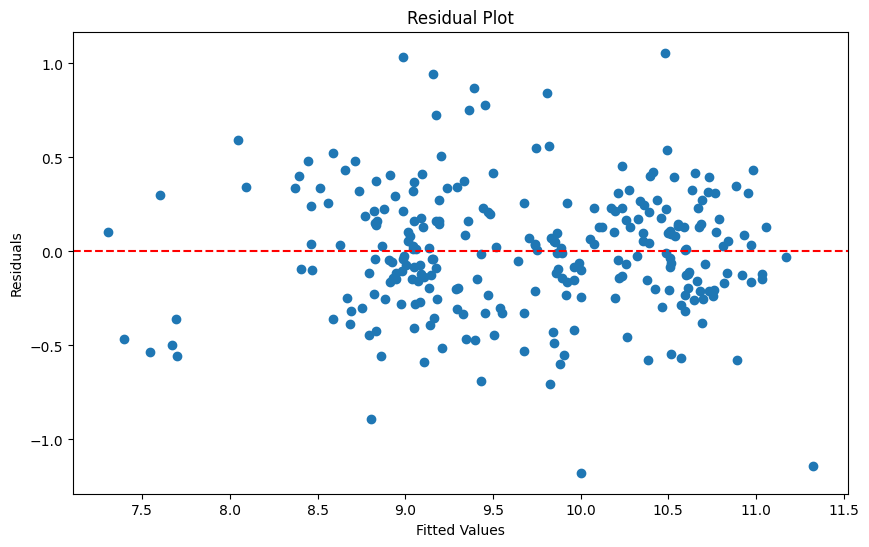

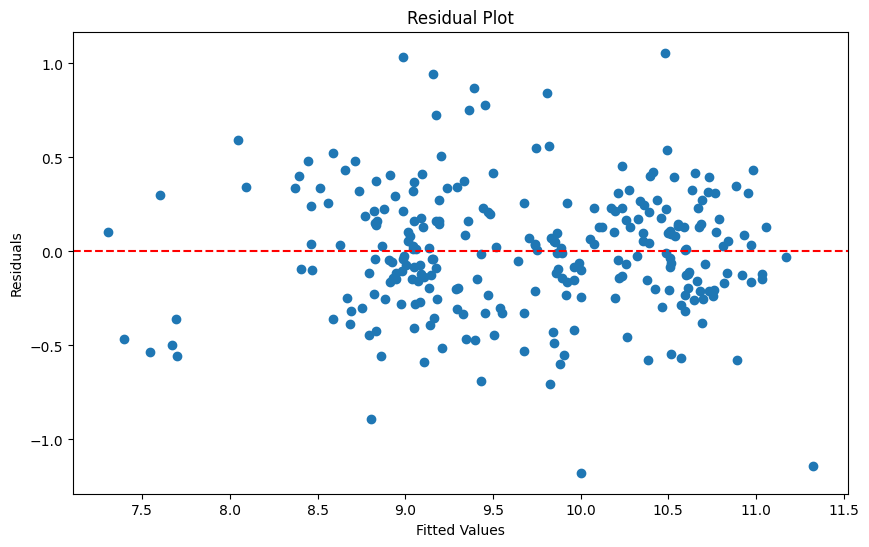

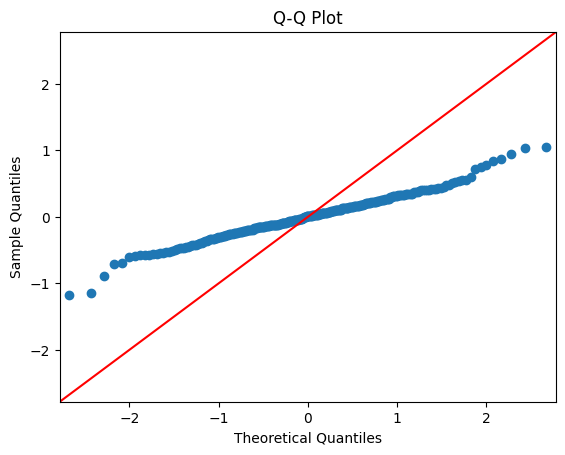

In [222]:
import matplotlib.pyplot as plt
import statsmodels.api as sm

def pooledOLS_mod_robust(pooled_ols_robust_model):
    # Fit the pooled OLS model with robust standard errors
    pooled_ols_robust_model = pooled_ols_model.get_robustcov_results(cov_type='HC3')

    # Display the results with robust standard errors
    print(pooled_ols_robust_model.summary())

    return pooled_ols_robust_model
pooled_ols_robust_model = pooledOLS_mod_robust(pooled_ols_model)

def pooledOLS_residual_plot(pooled_ols_model):
    # Residual analysis
    # Residual plot
    residuals = pooled_ols_model.resid
    plt.figure(figsize=(10, 6))
    plt.scatter(pooled_ols_robust_model.fittedvalues, residuals)
    plt.axhline(0, color='red', linestyle='--')
    plt.xlabel('Fitted Values')
    plt.ylabel('Residuals')
    plt.title('Residual Plot')
    plt.show()

    # Q-Q Plot
    sm.qqplot(residuals, line='45')
    plt.title('Q-Q Plot')
    plt.show()

    # Autocorrelation of Residuals
    sm.graphics.tsa.plot_acf(residuals, lags=40)
    plt.title('Autocorrelation of Residuals')
    plt.show()

pooledOLS_residual_plot(pooled_ols_robust_model)
pooledOLS_residual_plot(pooled_ols_model)


In [226]:
pooled_ols_clustered_model = sm.OLS(y, X).fit(cov_type='cluster', cov_kwds={'groups': filtered_df.index.get_level_values('bank')})

# Display the results with clustered standard errors
print(pooled_ols_clustered_model.summary())

                            OLS Regression Results                            
Dep. Variable:        Log_Web_Traffic   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                     2959.
Date:                Thu, 27 Jun 2024   Prob (F-statistic):           5.54e-16
Time:                        23:35:27   Log-Likelihood:                -84.066
No. Observations:                 264   AIC:                             190.1
Df Residuals:                     253   BIC:                             229.5
Df Model:                          10                                         
Covariance Type:              cluster                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    9.6575 

In [227]:
from statsmodels.stats.diagnostic import het_breuschpagan

# Perform Breusch-Pagan test
bp_test = het_breuschpagan(pooled_ols_model.resid, pooled_ols_model.model.exog)
labels = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
print(dict(zip(labels, bp_test)))

#robust
bp_test = het_breuschpagan(pooled_ols_robust_model.resid, pooled_ols_robust_model.model.exog)
labels = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
print(dict(zip(labels, bp_test)))

#clustered
bp_test = het_breuschpagan(pooled_ols_clustered_model.resid, pooled_ols_clustered_model.model.exog)
labels = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
print(dict(zip(labels, bp_test)))

{'Lagrange multiplier statistic': 17.773160971160557, 'p-value': 0.05891279225924894, 'f-value': 1.8262061696600642, 'f p-value': 0.05651583680553931}
{'Lagrange multiplier statistic': 17.773160971160557, 'p-value': 0.05891279225924894, 'f-value': 1.8262061696600642, 'f p-value': 0.05651583680553931}
{'Lagrange multiplier statistic': 17.773160971160557, 'p-value': 0.05891279225924894, 'f-value': 1.8262061696600642, 'f p-value': 0.05651583680553931}


In [241]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import seaborn as sns
import matplotlib.pyplot as plt

#numeric_columns = ['cross_visitation', 'rank', 'incentive', 'apr', 'mentions', 'search_interest', 'Log_Web_Traffic_Lag1']
numeric_columns = ['cross_visitation','search_interest', 'rank', 'apr']+ ['Log_Web_Traffic_Lag1']+['Log_incentive']
filtered_df[numeric_columns] = filtered_df[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Ensure the Month_9 column is numeric (if it contains True/False)
for month in ['Month_1','Month_2','Month_3','Month_4','Month_5','Month_6','Month_7','Month_8','Month_9','Month_10','Month_11','Month_12']:
    filtered_df[ month ] = filtered_df[ month ].astype(int)


# Define the independent variables including the lagged web traffic
ind_vars = numeric_columns + ['Month_1','Month_7','Month_9']

### multicollinearity 
X = sm.add_constant(filtered_df[ind_vars])

# Calculate VIF for each predictor
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print(vif_data)

# Correlation matrix
corr_matrix = X.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Matrix of Selected Columns")
plt.show()

# If multicollinearity is detected, consider dropping one of the correlated predictors or using regularization
# Fit the pooled OLS model without the correlated predictor
#X_reduced = X.drop(['search_interest'], axis=1)  # Example of dropping a predictor
X_reduced = X.drop(['cross_visitation','search_interest','rank'], axis=1)  # Example of dropping a predictor
#X_reduced = X
pooled_ols_model_reduced = sm.OLS(filtered_df['Log_Web_Traffic'], X_reduced).fit()

print(pooled_ols_model_reduced.summary())


#
bp_test = het_breuschpagan(pooled_ols_clustered_model.resid, pooled_ols_clustered_model.model.exog)
labels = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
print(dict(zip(labels, bp_test)))

                feature       VIF
0                 const  1.334334
1      cross_visitation  2.049234
2       search_interest  1.835398
3                  rank  1.301606
4                   apr  1.297937
5  Log_Web_Traffic_Lag1  2.236517
6         Log_incentive  1.460467
7               Month_1  1.026187
8               Month_7  1.024111
9               Month_9  1.022843


                            OLS Regression Results                            
Dep. Variable:        Log_Web_Traffic   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     255.3
Date:                Thu, 27 Jun 2024   Prob (F-statistic):          3.34e-105
Time:                        23:56:18   Log-Likelihood:                -88.136
No. Observations:                 264   AIC:                             190.3
Df Residuals:                     257   BIC:                             215.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    9.6568 

In [240]:
from statsmodels.stats.diagnostic import het_breuschpagan

pooled_ols_model = pooled_ols_model_reduced
# Perform Breusch-Pagan test
bp_test = het_breuschpagan(pooled_ols_model.resid, pooled_ols_model.model.exog)
labels = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
print(dict(zip(labels, bp_test)))

#model_validation(res)

{'Lagrange multiplier statistic': 12.170371121521818, 'p-value': 0.05827418658136938, 'f-value': 2.0700406277057777, 'f p-value': 0.05717006895578383}


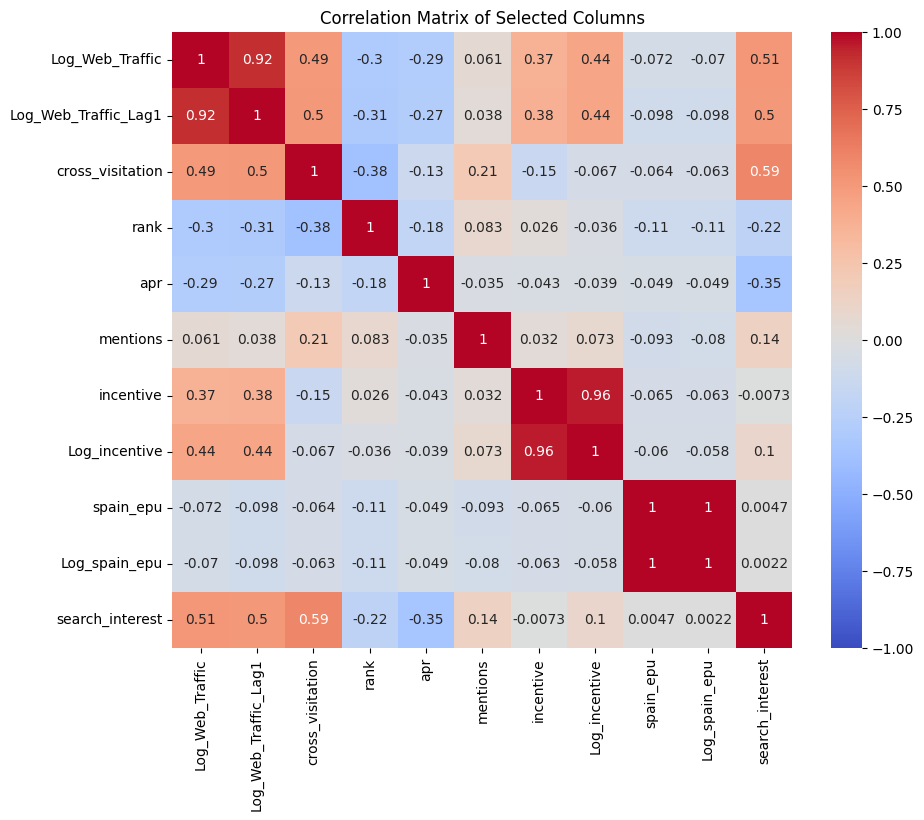

Variance
Log_Web_Traffic           0.788276
Log_Web_Traffic_Lag1      0.814792
cross_visitation          0.001587
rank                      5.330420
apr                       3.612844
mentions                  5.686492
incentive             15956.655060
Log_incentive             7.204327
spain_epu               283.094152
Log_spain_epu             0.013376
search_interest         399.782680

In [167]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Select the specific columns
interested_columns = ['cross_visitation', 'rank', 'apr', 'mentions','incentive','Log_incentive', 'spain_epu','Log_spain_epu','search_interest'] #,
time_sereis_column = ['Log_Web_Traffic', 'Log_Web_Traffic_Lag1']#, 'Log_Web_Traffic_Lag2', 'Log_Web_Traffic_Lag3','Log_Web_Traffic_Lag4']


selected_columns = time_sereis_column + interested_columns
filtered_df_selected = filtered_df[selected_columns]

# Calculate the mean, variance, skewness, and kurtosis for each selected column
means = filtered_df_selected.mean()
variances = filtered_df_selected.var()
skewness = filtered_df_selected.skew()
kurtosis = filtered_df_selected.kurtosis()

# Combine the four moments into a DataFrame
moments_df = pd.DataFrame({
    #'Mean': means,
    'Variance': variances,
    #'Skewness': skewness,
    #'Kurtosis': kurtosis
})


# Calculate the covariance matrix for the selected columns
cov_matrix = filtered_df_selected.cov()

# Plot the covariance matrix
plt.figure(figsize=(12, 8))
sns.heatmap(cov_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Covariance Matrix of Selected Columns")
plt.show()


corr_matrix = filtered_df_selected.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Matrix of Selected Columns")
plt.show()
moments_df


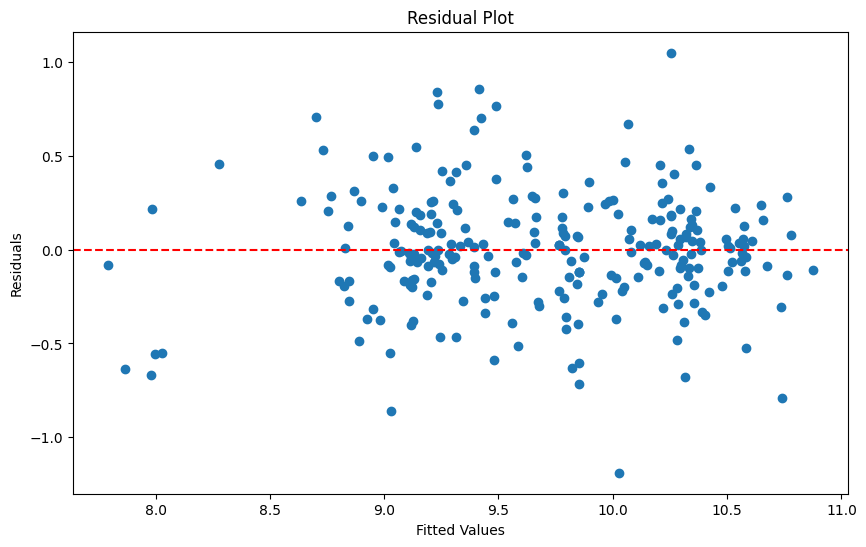

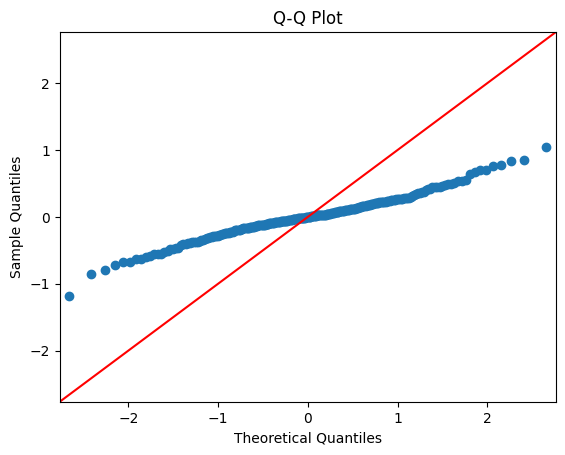

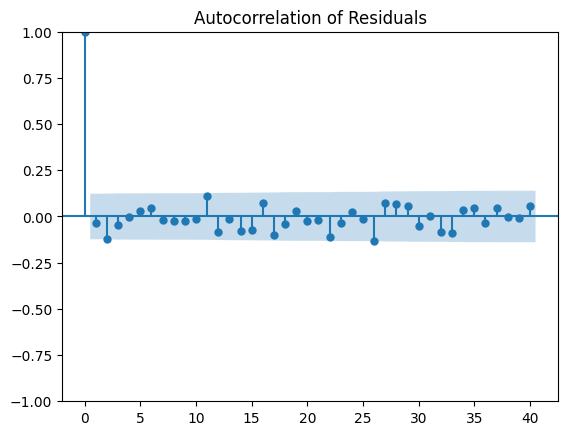

In [177]:
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Residual plot
residuals = res.resids
plt.figure(figsize=(10, 6))
plt.scatter(res.fitted_values, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

# Q-Q Plot
sm.qqplot(residuals, line='45')
plt.title('Q-Q Plot')
plt.show()

# Autocorrelation of Residuals
sm.graphics.tsa.plot_acf(residuals, lags=40)
plt.title('Autocorrelation of Residuals')
plt.show()


#### Starndarized Fixed Effect

In [147]:
ind_vars = [ 'cross_visitation','rank','apr'
       ,'Log_incentive','mentions' , 'search_interest']#,'Log_incentive'

# Define the dependent variable and independent variables
y = filtered_df['Log_Web_Traffic']
#X = filtered_df[['google trend','Web Traffic_Lag1' ] + monthly_dummies.columns.tolist()]
time_series_vars =  ['Log_Web_Traffic_Lag1']#,'Log_Web_Traffic_Lag2']#,'Log_Web_Traffic_Lag3','Log_Web_Traffic_Lag4']
seasonal_vars = ['Month_1','Month_9']
X = filtered_df[time_series_vars + ind_vars + seasonal_vars]

# Add a constant term to the model
X = sm.add_constant(X)

# Fit the fixed effects model with entity effects (account product effects)
mod = PanelOLS(y, X, entity_effects=True, drop_absorbed=True)
res = mod.fit()

# Display the results
print(res)

                          PanelOLS Estimation Summary                           
Dep. Variable:        Log_Web_Traffic   R-squared:                        0.4253
Estimator:                   PanelOLS   R-squared (Between):              0.9037
No. Observations:                 253   R-squared (Within):               0.4253
Date:                Thu, Jun 27 2024   R-squared (Overall):              0.8029
Time:                        17:32:53   Log-likelihood                   -61.287
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      19.157
Entities:                          11   P-value                           0.0000
Avg Obs:                       23.000   Distribution:                   F(9,233)
Min Obs:                       23.000                                           
Max Obs:                       23.000   F-statistic (robust):             19.157
                            

In [148]:
model_validation(res)

Durbin-Watson statistic: 2.261681511616502
{'Lagrange multiplier statistic': 22.111036659778666, 'p-value': 0.00853365324391146, 'f-value': 2.5856497477288722, 'f p-value': 0.007317876012652506}
Index(['const', 'Log_Web_Traffic_Lag1', 'cross_visitation', 'rank', 'apr',
       'Log_incentive', 'mentions', 'search_interest', 'Month_1', 'Month_9'],
      dtype='object')


In [149]:
correlations,average_correlation = calculate_absolute_correlation(res)
cross_sectional_correlation_test(correlations,average_correlation)

Average Absolute Correlation: 0.2825413940565513
Z-statistic: 18.641386501929766
P-value: 0.0


In [150]:
random_effects_model = RandomEffects(y, X)
re_results = random_effects_model.fit()


print(re_results)

                        RandomEffects Estimation Summary                        
Dep. Variable:        Log_Web_Traffic   R-squared:                        0.8575
Estimator:              RandomEffects   R-squared (Between):              0.9905
No. Observations:                 253   R-squared (Within):               0.3588
Date:                Thu, Jun 27 2024   R-squared (Overall):              0.8575
Time:                        17:32:59   Log-likelihood                   -81.944
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      162.44
Entities:                          11   P-value                           0.0000
Avg Obs:                       23.000   Distribution:                   F(9,243)
Min Obs:                       23.000                                           
Max Obs:                       23.000   F-statistic (robust):             162.44
                            

#### Random Effect vs Fixed Effect

In [151]:
import pandas as pd
import statsmodels.api as sm
from linearmodels.panel import PanelOLS, RandomEffects
from linearmodels.panel import compare

# Ensure your DataFrame is correctly formatted
filtered_df = filtered_df.apply(pd.to_numeric, errors='coerce')

# Define dependent and independent variables
y = filtered_df['Log_Web_Traffic']
ind_vars = ['cross_visitation', 'rank', 'Log_incentive', 'apr', 'Log_Web_Traffic_Lag1','Log_Web_Traffic_Lag2',  'Month_9']#, 'search_interest', 'mentions'
X = filtered_df[ind_vars]
X = sm.add_constant(X)

# Fit the Fixed Effects Model
fixed_effects_model = PanelOLS(y, X, entity_effects=True)
fe_results = fixed_effects_model.fit()

# Fit the Random Effects Model
random_effects_model = RandomEffects(y, X)
re_results = random_effects_model.fit()

# Perform Hausman Test
comparison = compare({'Fixed Effects': fe_results, 'Random Effects': re_results})
print(comparison)

                        Model Comparison                        
                               Fixed Effects      Random Effects
----------------------------------------------------------------
Dep. Variable                Log_Web_Traffic     Log_Web_Traffic
Estimator                           PanelOLS       RandomEffects
No. Observations                         253                 253
Cov. Est.                         Unadjusted          Unadjusted
R-squared                             0.4386              0.8682
R-Squared (Within)                    0.4386              0.3951
R-Squared (Between)                   0.9282              0.9945
R-Squared (Overall)                   0.8251              0.8682
F-statistic                           26.233              230.64
P-value (F-stat)                      0.0000              0.0000
======================     =================   =================
const                                 9.6878              9.6885
                         

we have to use degree of freedom to check with t table from t statistic value



In [152]:
import numpy as np

# Calculate the difference in coefficients
coef_diff = fe_results.params - re_results.params

# Calculate the difference in covariance matrices
diff_cov = fe_results.cov - re_results.cov

# Hausman statistic
hausman_stat = np.dot(np.dot(coef_diff.T, np.linalg.inv(diff_cov)), coef_diff)

# Degrees of freedom equals the number of coefficients being tested
df = len(coef_diff)

# Compute p-value for the chi-square distribution
from scipy.stats import chi2
p_value = 1 - chi2.cdf(hausman_stat, df)

print("Hausman Test Statistic:", hausman_stat)
print("Degrees of Freedom:", df)
print("P-value:", p_value)


Hausman Test Statistic: 27.210155988925344
Degrees of Freedom: 8
P-value: 0.0006502649931289239
